In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from geopy.geocoders import Nominatim
import folium


In [4]:
prueb=pd.read_csv('indicadores_latinoamerica.csv')

In [5]:
#importacion Local de la data de el banco mundial
data= pd.read_csv('WDIData.csv')

In [6]:
#verificacion de datos 
data.head()

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2014       2015       2016  \
0   NaN   NaN   NaN   NaN   NaN  ...  17.196986  17.597176  18.034249   
1   NaN   NaN   NaN   NaN   NaN  ...   6.580066   6.786218   6.941323   
2   NaN   NaN   NaN   NaN   NaN  ...  37.857526  38.204173  38.303515   
3   NaN   NaN   NaN   NaN   NaN  ...  31.824950  33.744405  38.733352   
4   NaN   NaN   NaN   NaN   NaN  ...  17.485006  16.329765  24.372504   

        2017       2018       2019       2020  2021  2022  Unnamed: 67  
0  18.345878  18.695306  19.149942  19.501837   NaN   NaN          NaN  
1   7.096843   7.254828   7.460783   7.599289   NaN   NaN          NaN  
2  38.421813  38.482409  38.692053  38.793983   NaN   NaN          NaN  
3  40.092163  42.880977  44.073912  45.609604   NaN   NaN          NaN  
4  25.153292  27.227391  29.383000  30.163364   NaN   NaN          NaN  

[5 rows x 68 columns]

In [189]:
#verificar cuales paises tiene 
data['Country Name'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle in

In [190]:
#verificar que indicadores tiene 
data['Indicator Name'].unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
       'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
       'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
       'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)',
       'Account ownership at a financial inst

In [191]:
#verificar los codigos de indicadores  
data['Indicator Code'].unique()

array(['EG.CFT.ACCS.ZS', 'EG.CFT.ACCS.RU.ZS', 'EG.CFT.ACCS.UR.ZS',
       'EG.ELC.ACCS.ZS', 'EG.ELC.ACCS.RU.ZS', 'EG.ELC.ACCS.UR.ZS',
       'FX.OWN.TOTL.ZS', 'FX.OWN.TOTL.FE.ZS', 'FX.OWN.TOTL.MA.ZS',
       'FX.OWN.TOTL.OL.ZS', 'FX.OWN.TOTL.40.ZS', 'FX.OWN.TOTL.PL.ZS',
       'FX.OWN.TOTL.60.ZS', 'FX.OWN.TOTL.SO.ZS', 'FX.OWN.TOTL.YG.ZS',
       'per_si_allsi.adq_pop_tot', 'per_allsp.adq_pop_tot',
       'per_sa_allsa.adq_pop_tot', 'per_lm_alllm.adq_pop_tot',
       'SE.PRM.TENR', 'SE.PRM.TENR.FE', 'SE.PRM.TENR.MA',
       'NY.ADJ.NNTY.KD.ZG', 'NY.ADJ.NNTY.KD', 'NY.ADJ.NNTY.CD',
       'NY.ADJ.NNTY.PC.KD.ZG', 'NY.ADJ.NNTY.PC.KD', 'NY.ADJ.NNTY.PC.CD',
       'NY.ADJ.SVNX.GN.ZS', 'NY.ADJ.SVNX.CD', 'NY.ADJ.SVNG.GN.ZS',
       'NY.ADJ.SVNG.CD', 'NY.ADJ.DCO2.GN.ZS', 'NY.ADJ.DCO2.CD',
       'NY.ADJ.DKAP.GN.ZS', 'NY.ADJ.DKAP.CD', 'NY.ADJ.AEDU.GN.ZS',
       'NY.ADJ.AEDU.CD', 'NY.ADJ.DNGY.GN.ZS', 'NY.ADJ.DNGY.CD',
       'NY.ADJ.ICTR.GN.ZS', 'NY.ADJ.DMIN.GN.ZS', 'NY.ADJ.DMIN.CD',
       'NY.A

In [7]:
#aprobacion de indicadores que se utilizaran en el analisis
indicadores = [
    "NY.GNP.PCAP.CD",  # PIB per cápita
    "SP.DYN.LE00.IN",  # Esperanza de vida al nacer
    "SH.DYN.MORT",  # Mortalidad infantil
    "SE.ADT.LITR.ZS",  # Tasa de alfabetización
    "SE.XPD.TOTL.GD.ZS",  # Gasto en educación
    "SH.H2O.SAFE.ZS",  # Acceso a agua potable
    "SH.MED.BEDS.ZS",  # Acceso a servicios de salud
    "SL.UEM.TOTL.ZS",  # Desempleo
    "SP.DYN.TFRT.IN"  # Tasa de fecundidad
]
indicadores_df = data.loc[data['Indicator Code'].isin(indicadores)]

# Lista de países de América Latina y el caribe 
paises_latinoamerica = ['Antigua and Barbuda', 'Argentina', 'Bolivia', 'Brazil', 'Belize', 'Bahamas, The', 'Barbados', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
 'Dominican Republic', 'Dominica', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico','Nicaragua', 'Panama', 'Paraguay',  
 'Peru', 'Puerto Rico', 'Suriname', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 'Trinidad and Tobago','Uruguay', 'Venezuela, RB']

df_latino = indicadores_df.loc[indicadores_df['Country Name'].isin(paises_latinoamerica)]

In [8]:
#lista de paises corregidos para crear un df con la latitud y longitud de cada uno

paises_latinoamerica2 = ['Antigua and Barbuda', 'Argentina', 'Bolivia', 'Brazil', 'Belize', 'Bahamas', 'Barbados', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
 'Dominican Republic', 'Dominica', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico','Nicaragua', 'Panama', 'Paraguay',  
 'Peru', 'Puerto Rico', 'Suriname', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 'Trinidad and Tobago','Uruguay', 'Venezuela']

# Crear un geocodificador
geolocator = Nominatim(user_agent="my_app")

# Lista para almacenar los datos de latitud y longitud
datos_geograficos = []

# Iterar sobre la lista de países
for pais in paises_latinoamerica2:
    try:
        # Geocodificar el país
        location = geolocator.geocode(pais)
        latitud = location.latitude
        longitud = location.longitude
        datos_geograficos.append({"País": pais, "Latitud": latitud, "Longitud": longitud})
    except:
        datos_geograficos.append({"País": pais, "Latitud": None, "Longitud": None})

# Crear un DataFrame con los datos geográficos
df_geografico = pd.DataFrame(datos_geograficos)

In [10]:
#revision de los datos 
df_geografico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   País      34 non-null     object 
 1   Latitud   34 non-null     float64
 2   Longitud  34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [2]:
#graficar  en el mapa los datos de la ubicacion de los paises

mapa = folium.Map(location=[0, -60], zoom_start=3)

for index, row in df_geografico.iterrows():
    pais = row['País']
    latitud = row['Latitud']
    longitud = row['Longitud']
    folium.Marker(location=[latitud, longitud], popup=pais).add_to(mapa)

mapa

NameError: name 'folium' is not defined

In [1]:
mapa.head()

NameError: name 'mapa' is not defined

In [196]:
#verificacion de df con los datos que necesitamos 
df_latino.head(10)

Country Name Country Code  \
81716  Antigua and Barbuda          ATG   
81797  Antigua and Barbuda          ATG   
81814  Antigua and Barbuda          ATG   
81860  Antigua and Barbuda          ATG   
81999  Antigua and Barbuda          ATG   
82006  Antigua and Barbuda          ATG   
82098  Antigua and Barbuda          ATG   
82720  Antigua and Barbuda          ATG   
83194            Argentina          ARG   
83275            Argentina          ARG   

                                          Indicator Name     Indicator Code  \
81716           Fertility rate, total (births per woman)     SP.DYN.TFRT.IN   
81797         GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD   
81814  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
81860                   Hospital beds (per 1,000 people)     SH.MED.BEDS.ZS   
81999            Life expectancy at birth, total (years)     SP.DYN.LE00.IN   
82006  Literacy rate, adult total (% of people ages 1...     SE.ADT.LITR.ZS   
82098    Mortality rate, under-5 (per 1,000 live births)        SH.DYN.MORT   
82720  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
83194           Fertility rate, total (births per woman)     SP.DYN.TFRT.IN   
83275         GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD   

            1960    1961    1962    1963      1964      1965  ...  \
81716   4.602000   4.559   4.547   4.536     4.484     4.416  ...   
81797        NaN     NaN     NaN     NaN       NaN       NaN  ...   
81814        NaN     NaN     NaN     NaN       NaN       NaN  ...   
81860   7.706422     NaN     NaN     NaN       NaN       NaN  ...   
81999  61.550000  62.363  63.192  64.101    65.058    66.026  ...   
82006        NaN     NaN     NaN     NaN       NaN       NaN  ...   
82098  86.300000  80.400  74.000  67.400    60.800    54.500  ...   
82720        NaN     NaN     NaN     NaN       NaN       NaN  ...   
83194   3.075000   3.069   3.106   3.101     3.080     3.062  ...   
83275        NaN     NaN     NaN     NaN  1130.000  1240.000  ...   

               2014          2015        2016         2017         2018  \
81716      1.526000      1.567000      1.4580      1.48500      1.37100   
81797  13230.000000  13370.000000  14170.0000  15000.00000  16680.00000   
81814      2.701471      2.840734      2.4308      2.44848      2.64408   
81860      3.550000      3.610000      3.0100      2.89000          NaN   
81999     77.858000     77.913000     78.1520     78.26800     78.51100   
82006           NaN     98.949997         NaN          NaN          NaN   
82098      8.100000      7.700000      7.4000      7.10000      6.80000   
82720           NaN           NaN         NaN          NaN          NaN   
83194      2.312000      2.301000      2.2410      2.16800      2.03900   
83275  12350.000000  12600.000000  12220.0000  13140.00000  12430.00000   

              2019         2020         2021  2022  Unnamed: 67  
81716      1.46800      1.56900      1.58000   NaN          NaN  
81797  17310.00000  14530.00000  15780.00000   NaN          NaN  
81814      2.83134      3.45312      3.83625   NaN          NaN  
81860          NaN          NaN          NaN   NaN          NaN  
81999     78.69100     78.84100     78.49700   NaN          NaN  
82006          NaN          NaN          NaN   NaN          NaN  
82098      6.60000      6.40000      6.10000   NaN          NaN  
82720          NaN          NaN          NaN   NaN          NaN  
83194      1.99400      1.91100      1.88500   NaN          NaN  
83275  11220.00000   9010.00000   9960.00000   NaN          NaN  

[10 rows x 68 columns]

In [197]:
#eliminacion de columnas que no necesitamos 
columnas_eliminar = [str(year) for year in range(1960, 1991)]

df_latino = df_latino.drop(columnas_eliminar, axis=1)


In [198]:
df_latino.head(10)

Country Name Country Code  \
81716  Antigua and Barbuda          ATG   
81797  Antigua and Barbuda          ATG   
81814  Antigua and Barbuda          ATG   
81860  Antigua and Barbuda          ATG   
81999  Antigua and Barbuda          ATG   
82006  Antigua and Barbuda          ATG   
82098  Antigua and Barbuda          ATG   
82720  Antigua and Barbuda          ATG   
83194            Argentina          ARG   
83275            Argentina          ARG   

                                          Indicator Name     Indicator Code  \
81716           Fertility rate, total (births per woman)     SP.DYN.TFRT.IN   
81797         GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD   
81814  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
81860                   Hospital beds (per 1,000 people)     SH.MED.BEDS.ZS   
81999            Life expectancy at birth, total (years)     SP.DYN.LE00.IN   
82006  Literacy rate, adult total (% of people ages 1...     SE.ADT.LITR.ZS   
82098    Mortality rate, under-5 (per 1,000 live births)        SH.DYN.MORT   
82720  Unemployment, total (% of total labor force) (...     SL.UEM.TOTL.ZS   
83194           Fertility rate, total (births per woman)     SP.DYN.TFRT.IN   
83275         GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD   

           1991      1992       1993      1994      1995      1996  ...  \
81716     2.036     2.126     2.0360     2.069     2.159     2.266  ...   
81797  7200.000  7440.000  7950.0000  8470.000  8170.000  8750.000  ...   
81814       NaN       NaN        NaN       NaN       NaN       NaN  ...   
81860       NaN       NaN     6.1048       NaN       NaN     3.880  ...   
81999    73.435    73.417    73.4820    73.591    73.636    73.829  ...   
82006       NaN       NaN        NaN       NaN       NaN       NaN  ...   
82098    14.400    14.700    15.1000    15.500    15.700    16.000  ...   
82720       NaN       NaN        NaN       NaN       NaN       NaN  ...   
83194     3.012     2.987     2.9660     2.935     2.864     2.781  ...   
83275  3860.000  6060.000  7110.0000  7600.000  7340.000  7700.000  ...   

               2014          2015        2016         2017         2018  \
81716      1.526000      1.567000      1.4580      1.48500      1.37100   
81797  13230.000000  13370.000000  14170.0000  15000.00000  16680.00000   
81814      2.701471      2.840734      2.4308      2.44848      2.64408   
81860      3.550000      3.610000      3.0100      2.89000          NaN   
81999     77.858000     77.913000     78.1520     78.26800     78.51100   
82006           NaN     98.949997         NaN          NaN          NaN   
82098      8.100000      7.700000      7.4000      7.10000      6.80000   
82720           NaN           NaN         NaN          NaN          NaN   
83194      2.312000      2.301000      2.2410      2.16800      2.03900   
83275  12350.000000  12600.000000  12220.0000  13140.00000  12430.00000   

              2019         2020         2021  2022  Unnamed: 67  
81716      1.46800      1.56900      1.58000   NaN          NaN  
81797  17310.00000  14530.00000  15780.00000   NaN          NaN  
81814      2.83134      3.45312      3.83625   NaN          NaN  
81860          NaN          NaN          NaN   NaN          NaN  
81999     78.69100     78.84100     78.49700   NaN          NaN  
82006          NaN          NaN          NaN   NaN          NaN  
82098      6.60000      6.40000      6.10000   NaN          NaN  
82720          NaN          NaN          NaN   NaN          NaN  
83194      1.99400      1.91100      1.88500   NaN          NaN  
83275  11220.00000   9010.00000   9960.00000   NaN          NaN  

[10 rows x 37 columns]

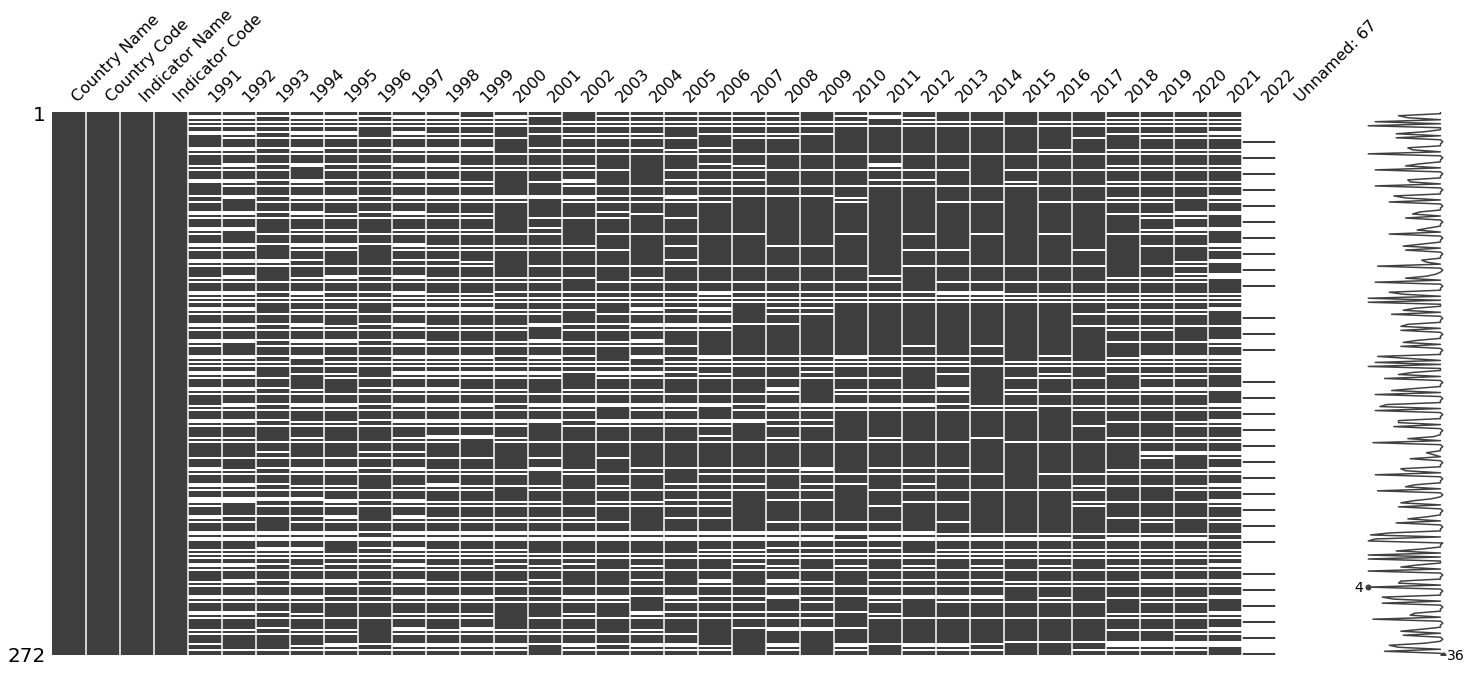

In [199]:
#creacion de grafico para ver los datos nulos
msno.matrix(df_latino)

# Mostrar el gráfico
plt.show()

In [200]:
df_latino.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', 'Unnamed: 67'],
      dtype='object')

In [201]:
#eliminacion de columnas que no tendremos en cuenta
df_latino = df_latino.drop(['Unnamed: 67'], axis=1)

In [202]:
#verificacion  de filas que tengan un 15 %
porcentaje_nulos = df_latino.isnull().mean(axis=1) * 100
filas_con_nulos = porcentaje_nulos[porcentaje_nulos >= 15].index
filas_con_nulos

Int64Index([ 81814,  81860,  82006,  82720,  83292,  83338,  83484,  92160,
             92206,  92352,
            ...
            362634, 362680, 362826, 378892, 378938, 379084, 383309, 383326,
            383372, 383518],
           dtype='int64', length=106)

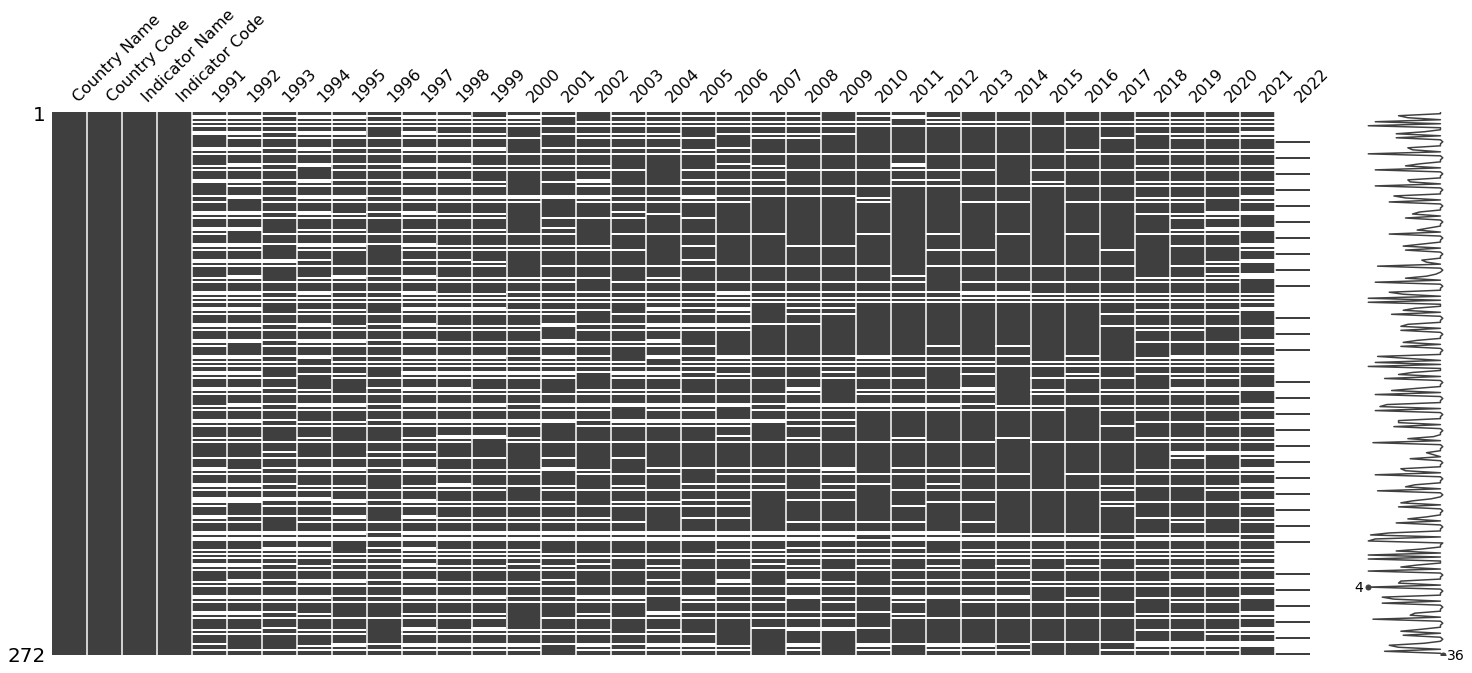

In [203]:
msno.matrix(df_latino)

# Mostrar el gráfico
plt.show()

In [204]:
#eliminacion de filas con el porcentaje de nulos
df_latino = df_latino.drop(filas_con_nulos)

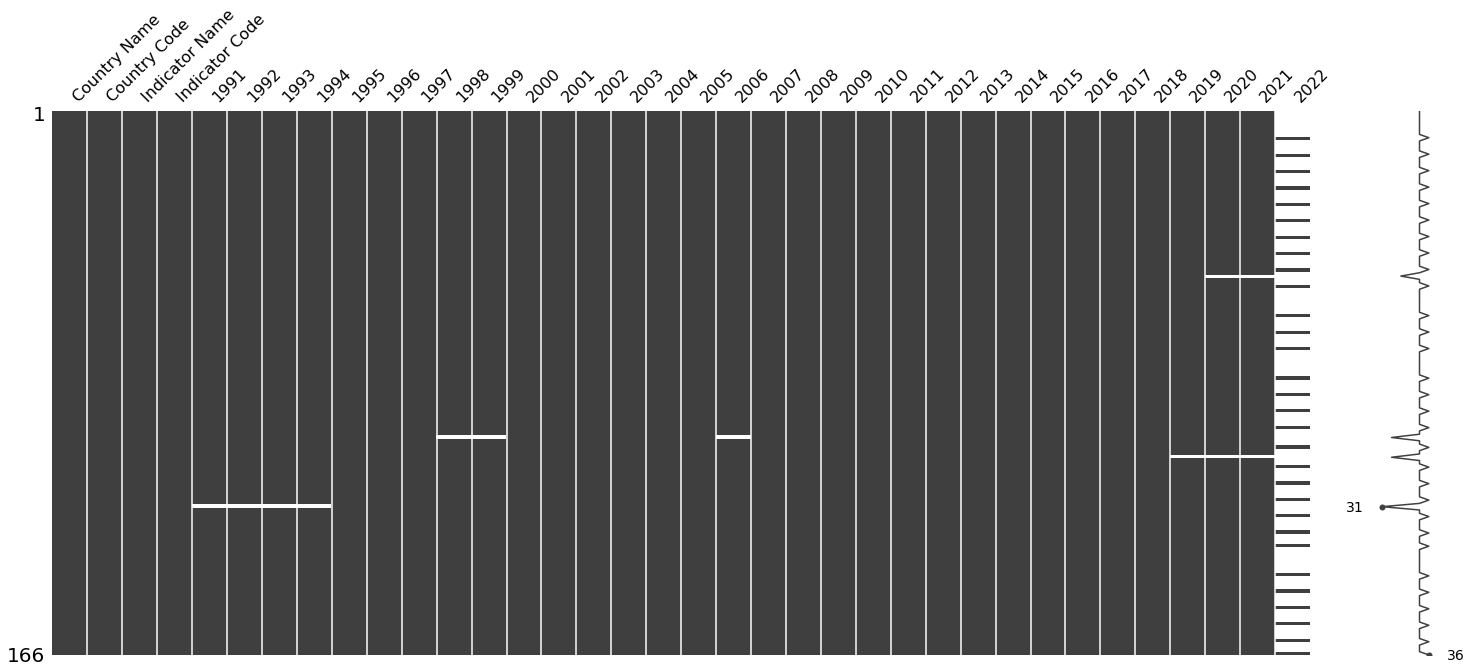

In [205]:
msno.matrix(df_latino)

# Mostrar el gráfico
plt.show()

In [228]:
#eliminacion de la columna 2022  por no tener la sificiente informacion
df_latino = df_latino.drop(['2022'], axis=1)

In [206]:
df_latino.head()

Country Name Country Code  \
81716  Antigua and Barbuda          ATG   
81797  Antigua and Barbuda          ATG   
81999  Antigua and Barbuda          ATG   
82098  Antigua and Barbuda          ATG   
83194            Argentina          ARG   

                                        Indicator Name  Indicator Code  \
81716         Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   
81797       GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   
81999          Life expectancy at birth, total (years)  SP.DYN.LE00.IN   
82098  Mortality rate, under-5 (per 1,000 live births)     SH.DYN.MORT   
83194         Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   

           1991      1992      1993      1994      1995      1996  ...  \
81716     2.036     2.126     2.036     2.069     2.159     2.266  ...   
81797  7200.000  7440.000  7950.000  8470.000  8170.000  8750.000  ...   
81999    73.435    73.417    73.482    73.591    73.636    73.829  ...   
82098    14.400    14.700    15.100    15.500    15.700    16.000  ...   
83194     3.012     2.987     2.966     2.935     2.864     2.781  ...   

            2013       2014       2015       2016       2017       2018  \
81716      1.537      1.526      1.567      1.458      1.485      1.371   
81797  13040.000  13230.000  13370.000  14170.000  15000.000  16680.000   
81999     77.583     77.858     77.913     78.152     78.268     78.511   
82098      8.600      8.100      7.700      7.400      7.100      6.800   
83194      2.322      2.312      2.301      2.241      2.168      2.039   

            2019       2020       2021  2022  
81716      1.468      1.569      1.580   NaN  
81797  17310.000  14530.000  15780.000   NaN  
81999     78.691     78.841     78.497   NaN  
82098      6.600      6.400      6.100   NaN  
83194      1.994      1.911      1.885   NaN  

[5 rows x 36 columns]

In [229]:
df_latino['Country Code'].unique()

array(['ATG', 'ARG', 'BHS', 'BRB', 'BLZ', 'BOL', 'BRA', 'CHL', 'COL',
       'CRI', 'CUB', 'DMA', 'DOM', 'ECU', 'SLV', 'GRD', 'GTM', 'GUY',
       'HTI', 'HND', 'JAM', 'MEX', 'NIC', 'PAN', 'PRY', 'PER', 'PRI',
       'KNA', 'LCA', 'VCT', 'SUR', 'TTO', 'URY', 'VEN'], dtype=object)

In [207]:

df_latino['Indicator Name'].unique()

array(['Fertility rate, total (births per woman)',
       'GNI per capita, Atlas method (current US$)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Government expenditure on education, total (% of GDP)',
       'Hospital beds (per 1,000 people)'], dtype=object)

In [208]:
#creacion de df por cada indicador 
indicador1 = df_latino[df_latino['Indicator Name'] == 'Fertility rate, total (births per woman)' ]
indicador2 = df_latino[df_latino['Indicator Name'] == 'GNI per capita, Atlas method (current US$)']
indicador3 = df_latino[df_latino['Indicator Name'] == 'Life expectancy at birth, total (years)']
indicador4 = df_latino[df_latino['Indicator Name'] == 'Mortality rate, under-5 (per 1,000 live births)']
indicador5 = df_latino[df_latino['Indicator Name'] == 'Unemployment, total (% of total labor force) (modeled ILO estimate)']
indicador6 = df_latino[df_latino['Indicator Name'] == 'Government expenditure on education, total (% of GDP)']
indicador7 = df_latino[df_latino['Indicator Name'] == 'Hospital beds (per 1,000 people)']



In [209]:
df_latino


Country Name Country Code  \
81716              Antigua and Barbuda          ATG   
81797              Antigua and Barbuda          ATG   
81999              Antigua and Barbuda          ATG   
82098              Antigua and Barbuda          ATG   
83194                        Argentina          ARG   
83275                        Argentina          ARG   
83477                        Argentina          ARG   
83576                        Argentina          ARG   
84198                        Argentina          ARG   
92062                     Bahamas, The          BHS   
92143                     Bahamas, The          BHS   
92345                     Bahamas, The          BHS   
92444                     Bahamas, The          BHS   
93066                     Bahamas, The          BHS   
96496                         Barbados          BRB   
96577                         Barbados          BRB   
96779                         Barbados          BRB   
96878                         Barbados          BRB   
97500                         Barbados          BRB   
100930                          Belize          BLZ   
101011                          Belize          BLZ   
101213                          Belize          BLZ   
101312                          Belize          BLZ   
101934                          Belize          BLZ   
106842                         Bolivia          BOL   
106923                         Bolivia          BOL   
107125                         Bolivia          BOL   
107224                         Bolivia          BOL   
107846                         Bolivia          BOL   
111276                          Brazil          BRA   
111357                          Brazil          BRA   
111559                          Brazil          BRA   
111658                          Brazil          BRA   
112280                          Brazil          BRA   
131968                           Chile          CHL   
132049                           Chile          CHL   
132251                           Chile          CHL   
132350                           Chile          CHL   
132972                           Chile          CHL   
134924                        Colombia          COL   
135005                        Colombia          COL   
135207                        Colombia          COL   
135306                        Colombia          COL   
135928                        Colombia          COL   
140836                      Costa Rica          CRI   
140917                      Costa Rica          CRI   
141119                      Costa Rica          CRI   
141218                      Costa Rica          CRI   
141840                      Costa Rica          CRI   
145270                            Cuba          CUB   
145351                            Cuba          CUB   
145553                            Cuba          CUB   
145652                            Cuba          CUB   
146274                            Cuba          CUB   
154138                        Dominica          DMA   
154219                        Dominica          DMA   
154421                        Dominica          DMA   
154520                        Dominica          DMA   
155616              Dominican Republic          DOM   
155697              Dominican Republic          DOM   
155899              Dominican Republic          DOM   
155998              Dominican Republic          DOM   
156620              Dominican Republic          DOM   
157094                         Ecuador          ECU   
157175                         Ecuador          ECU   
157377                         Ecuador          ECU   
157476                         Ecuador          ECU   
158098                         Ecuador          ECU   
160050                     El Salvador          SLV   
160131                     El Salvador          SLV   
160333                     El Salvador          SLV   
160432                     El Salvador          SLV   
161054     

In [234]:
#indicador1.head(35)
#indicador2.head(35)
#indicador3.head(35)
#indicador4.head(35)
indicador5.head(35)
#indicador6.head(35) solo un pais tiene este indicador Jamaica
#indicador7.head(35) solo un pais tiene este indicador Mexico

Country Name Country Code  \
84198                        Argentina          ARG   
93066                     Bahamas, The          BHS   
97500                         Barbados          BRB   
101934                          Belize          BLZ   
107846                         Bolivia          BOL   
112280                          Brazil          BRA   
132972                           Chile          CHL   
135928                        Colombia          COL   
141840                      Costa Rica          CRI   
146274                            Cuba          CUB   
156620              Dominican Republic          DOM   
158098                         Ecuador          ECU   
161054                     El Salvador          SLV   
192092                       Guatemala          GTM   
196526                          Guyana          GUY   
198004                           Haiti          HTI   
199482                        Honduras          HND   
217218                         Jamaica          JAM   
261558                          Mexico          MEX   
283728                       Nicaragua          NIC   
297030                          Panama          PAN   
299986                        Paraguay          PRY   
301464                            Peru          PER   
307376                     Puerto Rico          PRI   
342848                       St. Lucia          LCA   
345804  St. Vincent and the Grenadines          VCT   
348760                        Suriname          SUR   
363540             Trinidad and Tobago          TTO   
379798                         Uruguay          URY   
384232                   Venezuela, RB          VEN   

                                           Indicator Name  Indicator Code  \
84198   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
93066   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
97500   Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
101934  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
107846  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
112280  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
132972  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
135928  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
141840  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
146274  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
156620  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
158098  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
161054  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
192092  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
196526  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
198004  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
199482  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
217218  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
261558  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
283728  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
297030  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
299986  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
301464  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
307376  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
342848  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
345804  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
348760  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
363540  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
379798  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.ZS   
384232  Un

In [211]:
indicador1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 81716 to 383228
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    34 non-null     object 
 1   Country Code    34 non-null     object 
 2   Indicator Name  34 non-null     object 
 3   Indicator Code  34 non-null     object 
 4   1991            34 non-null     float64
 5   1992            34 non-null     float64
 6   1993            34 non-null     float64
 7   1994            34 non-null     float64
 8   1995            34 non-null     float64
 9   1996            34 non-null     float64
 10  1997            34 non-null     float64
 11  1998            34 non-null     float64
 12  1999            34 non-null     float64
 13  2000            34 non-null     float64
 14  2001            34 non-null     float64
 15  2002            34 non-null     float64
 16  2003            34 non-null     float64
 17  2004            34 non-null  

In [212]:
indicador1.describe()

1991       1992       1993       1994       1995       1996  \
count  34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    3.311912   3.260618   3.188029   3.114176   3.053353   2.973412   
std     0.969041   0.939941   0.918138   0.894173   0.865228   0.852953   
min     1.658000   1.561000   1.491000   1.461000   1.471000   1.437000   
25%     2.670250   2.737500   2.686000   2.515750   2.522750   2.402000   
50%     3.093000   3.130500   3.086500   2.970000   2.886500   2.816000   
75%     3.761750   3.652500   3.545000   3.453750   3.381000   3.309500   
max     5.377000   5.314000   5.254000   5.191000   5.105000   5.008000   

            1997       1998       1999       2000  ...       2013       2014  \
count  34.000000  34.000000  34.000000  34.000000  ...  34.000000  34.000000   
mean    2.917882   2.846118   2.792853   2.734456  ...   2.166118   2.143588   
std     0.821950   0.805227   0.779521   0.755608  ...   0.494072   0.477989   
min     1.563000   1.588000   1.618000   1.581000  ...   1.470000   1.432000   
25%     2.394500   2.345250   2.328000   2.197500  ...   1.714250   1.703250   
50%     2.776000   2.672500   2.635000   2.586500  ...   2.162500   2.137000   
75%     3.240750   3.183500   3.133500   3.080750  ...   2.529000   2.500000   
max     4.906000   4.800000   4.687000   4.583000  ...   3.216000   3.157000   

            2015       2016       2017       2018       2019       2020  \
count  34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    2.115132   2.068250   2.026588   1.988324   1.948294   1.916559   
std     0.469297   0.475477   0.474930   0.471163   0.457924   0.448970   
min     1.336500   1.242500   1.101000   1.035000   0.982000   0.922000   
25%     1.694000   1.661750   1.618500   1.622000   1.578750   1.558500   
50%     2.112500   2.055500   1.986500   1.934500   1.877000   1.862000   
75%     2.469500   2.442750   2.420000   2.398250   2.367250   2.333750   
max     3.108000   3.062000   3.016000   2.959000   2.919000   2.869000   

            2021  2022  
count  34.000000   0.0  
mean    1.895529   NaN  
std     0.438457   NaN  
min     0.907000   NaN  
25%     1.547750   NaN  
50%     1.812500   NaN  
75%     2.309000   NaN  
max     2.814000   NaN  

[8 rows x 32 columns]

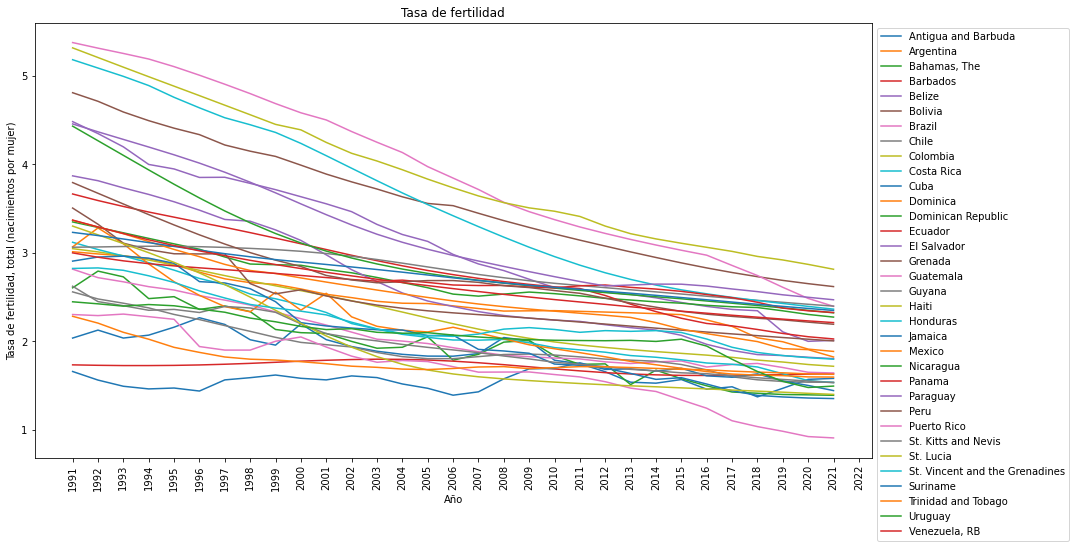

In [213]:
# Crear gráfico de línea para el indicador  'Fertility rate, total (births per woman) / 'Tasa de fertilidad, total (nacimientos por mujer)
#  en todos los paises
plt.figure(figsize=(15, 8))

# Iterar sobre cada fila del DataFrame
for index, row in indicador1.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Agregar la línea correspondiente al país
    plt.plot(datos.index, datos.values, label=row['Country Name'])

plt.xlabel('Año')
plt.ylabel('Tasa de fertilidad, total (nacimientos por mujer)')
plt.title('Tasa de fertilidad')
plt.xticks(rotation='vertical')

# Ajustar la ubicación de la leyenda
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

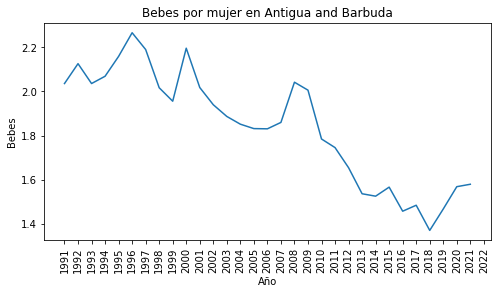

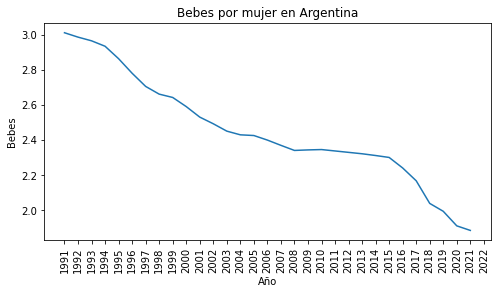

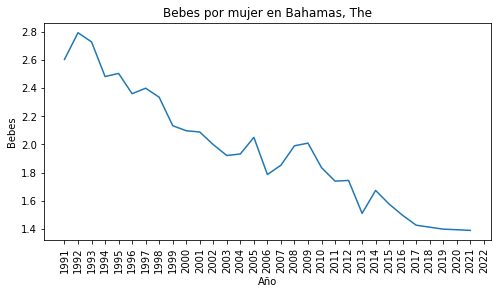

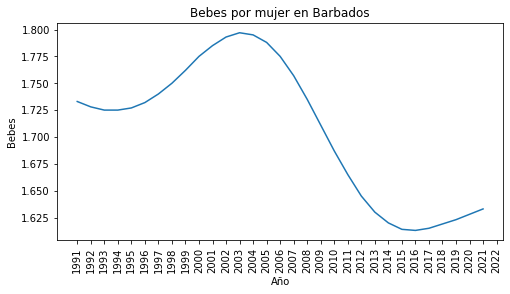

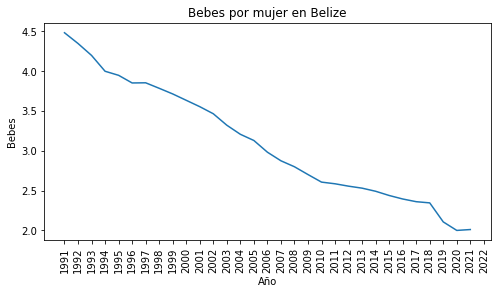

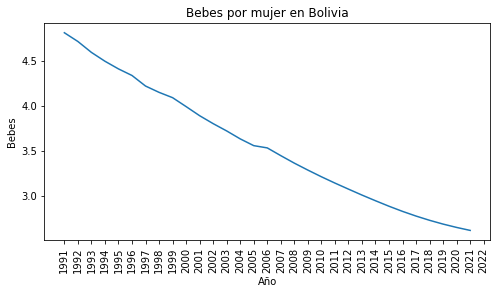

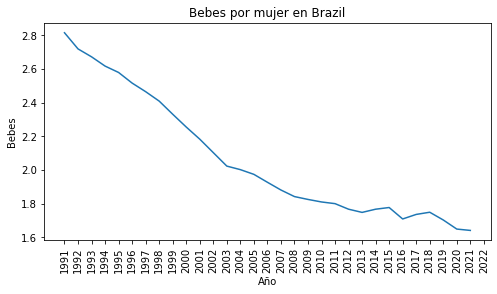

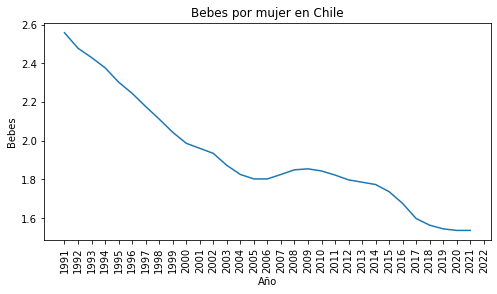

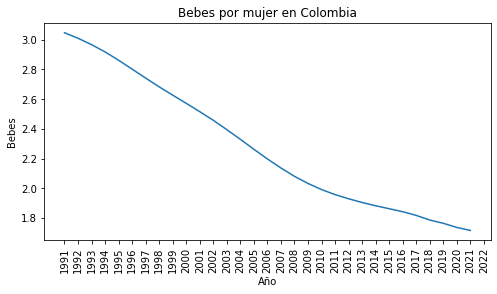

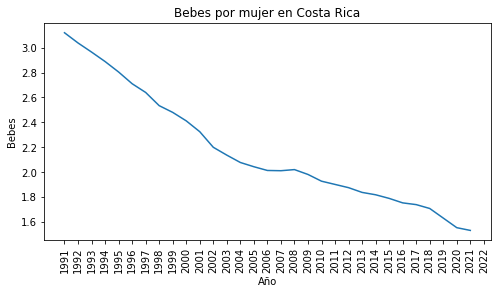

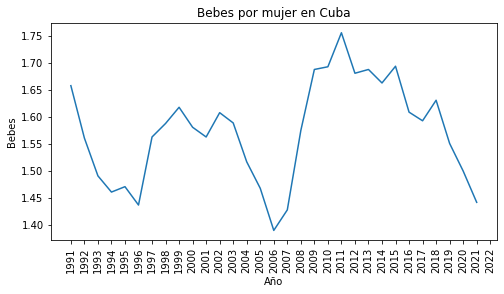

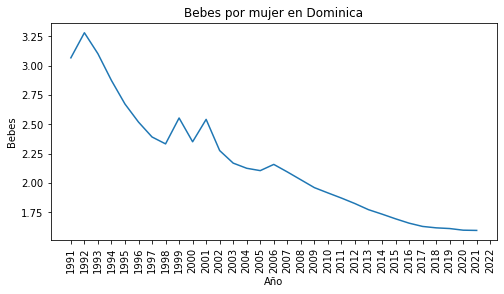

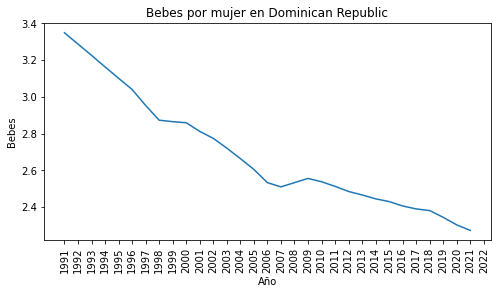

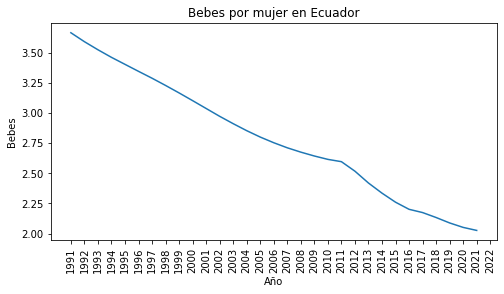

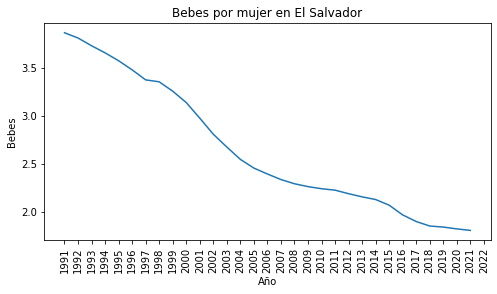

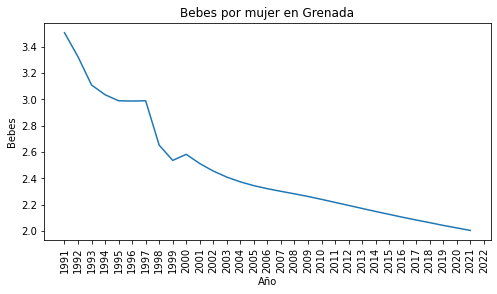

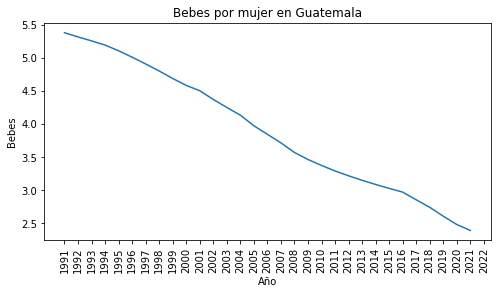

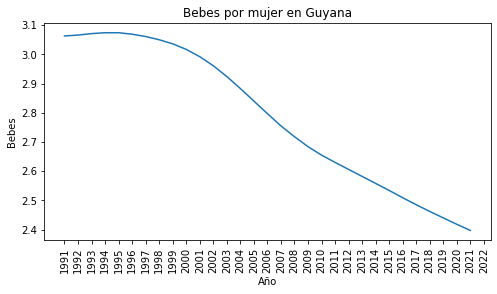

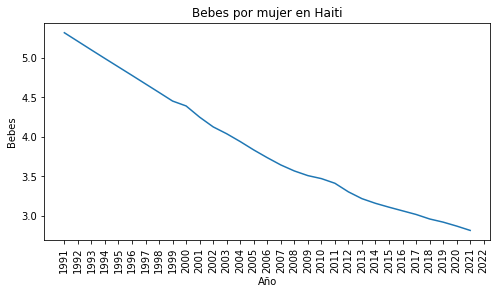

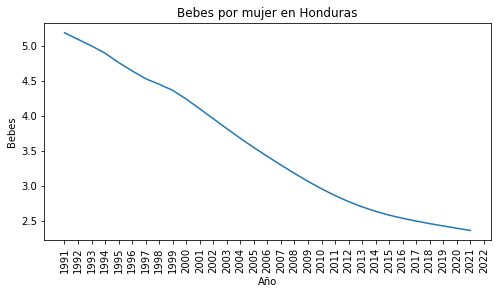

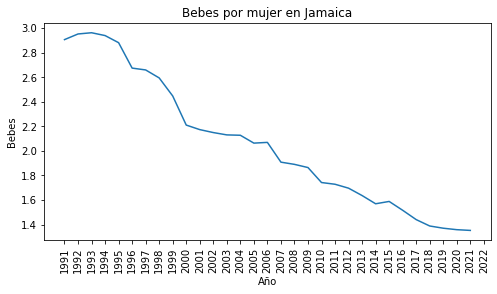

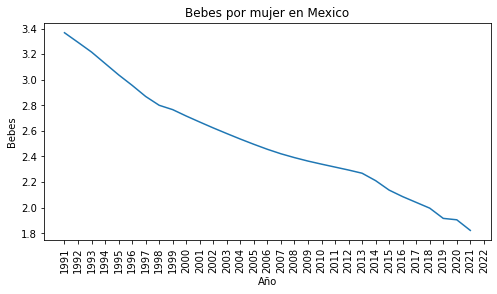

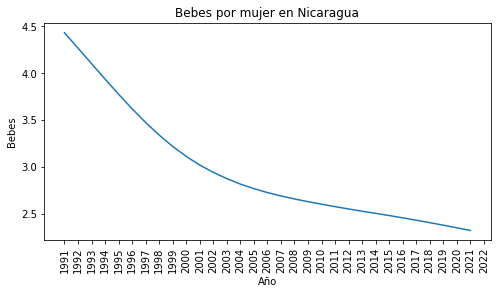

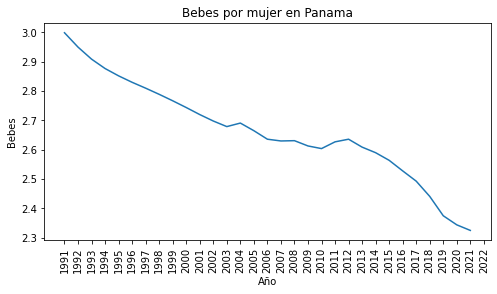

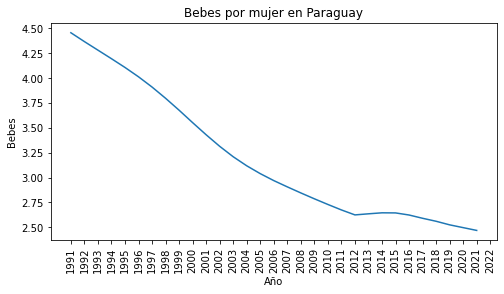

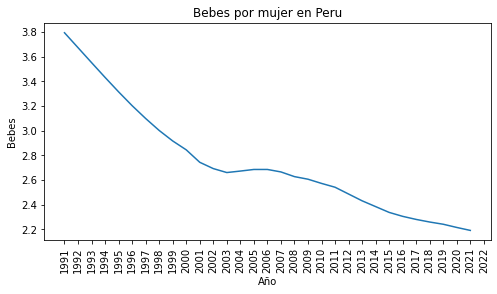

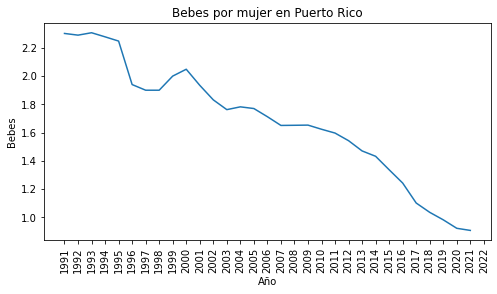

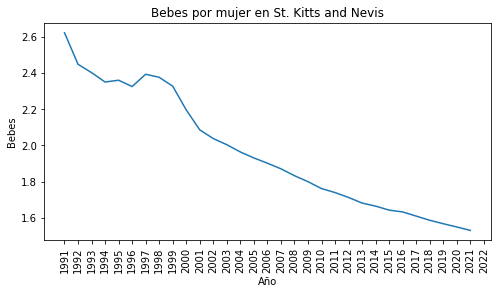

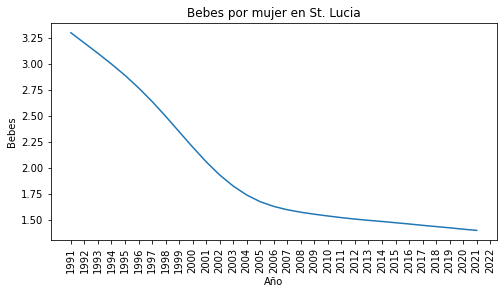

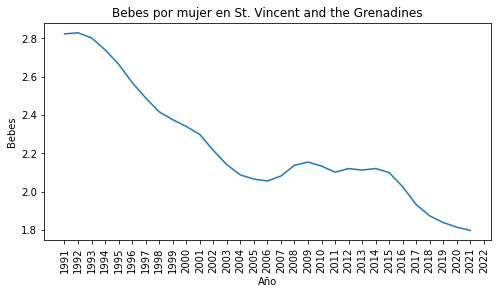

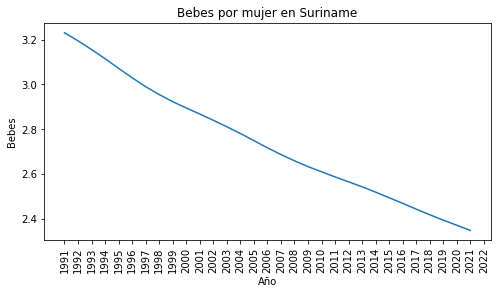

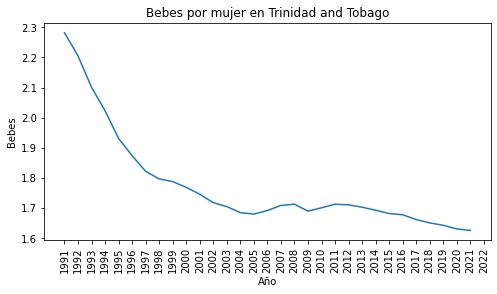

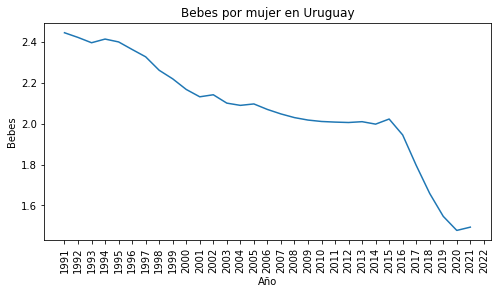

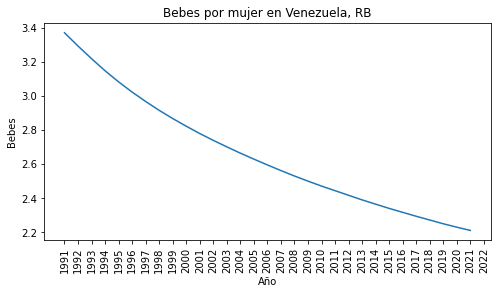

In [214]:

# iteracion sobre cada fila del DataFrame para tener un grafico por cada pais
for index, row in indicador1.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Crear gráfico de línea para cada país
    plt.figure(figsize=(8, 4))
    plt.plot(datos.index, datos.values)
    plt.xlabel('Año')
    plt.ylabel('Bebes')
    plt.title(f'Bebes por mujer en {row["Country Name"]}')
    plt.xticks(rotation='vertical')
    plt.show()

C:\Users\OKKA\AppData\Local\Temp\ipykernel_17424\2964851719.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = indicador1.corr()


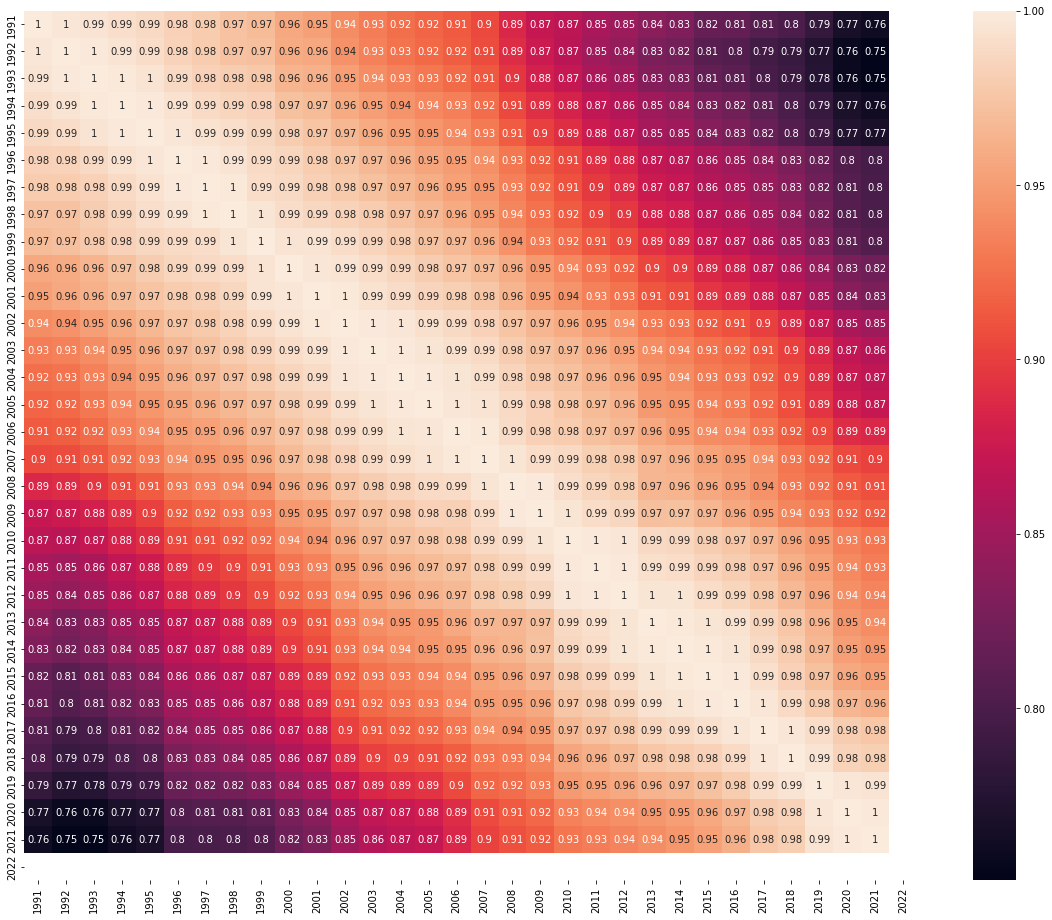

In [215]:
# Matriz de correlación entre las columnas numéricas del indicador 'Fertility rate, total (births per woman) / 'Tasa de fertilidad, total (nacimientos por mujer)'
plt.figure(figsize=(20, 16))  # Ajusta el tamaño de la figura
correlation_matrix = indicador1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation='vertical')
plt.show()



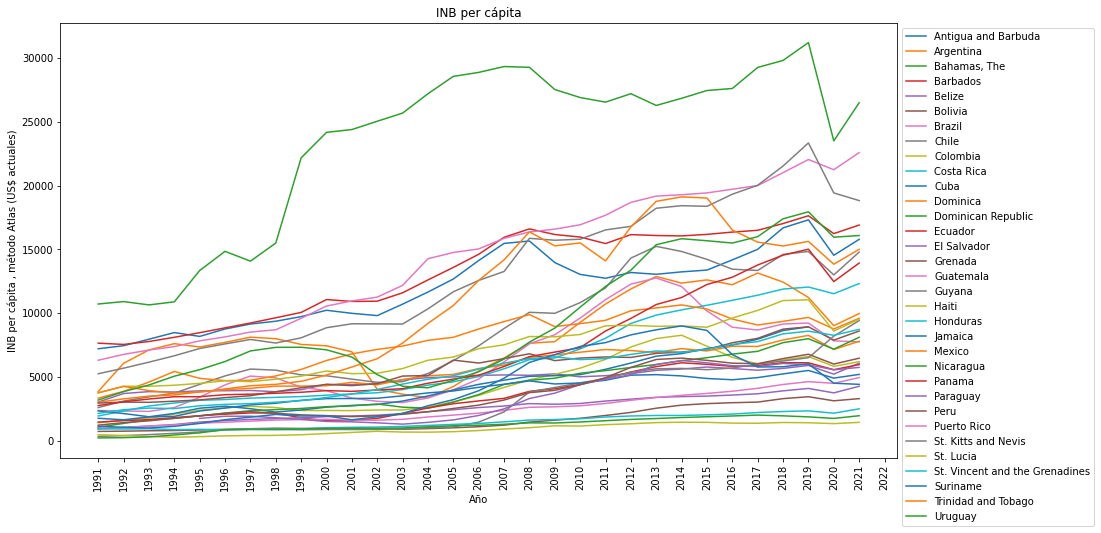

In [216]:
# Crear gráfico de línea para el indicador 'GNI per capita, Atlas method (current US$)' / 'INB per cápita, método Atlas (US$ actuales)' en todos los paises
plt.figure(figsize=(15, 8))

# Iterar sobre cada fila del DataFrame
for index, row in indicador2.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Agregar la línea correspondiente al país
    plt.plot(datos.index, datos.values, label=row['Country Name'])

plt.xlabel('Año')
plt.ylabel('INB per cápita , método Atlas (US$ actuales)')
plt.title('INB per cápita')
plt.xticks(rotation='vertical')

# Ajustar la ubicación de la leyenda
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

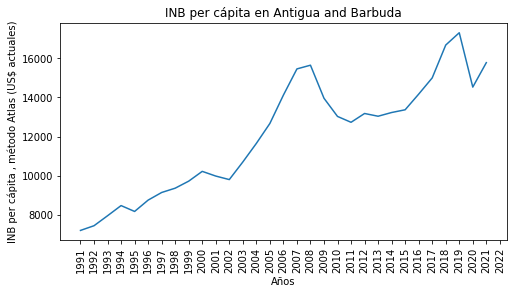

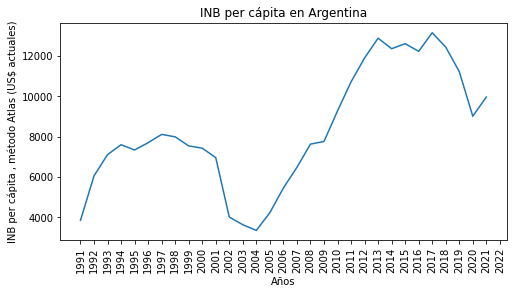

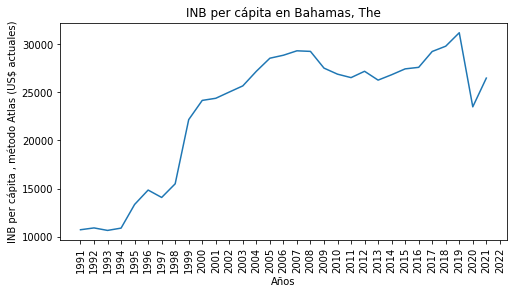

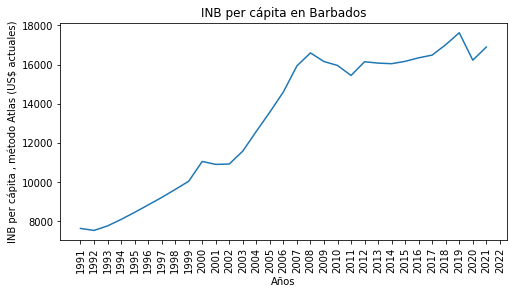

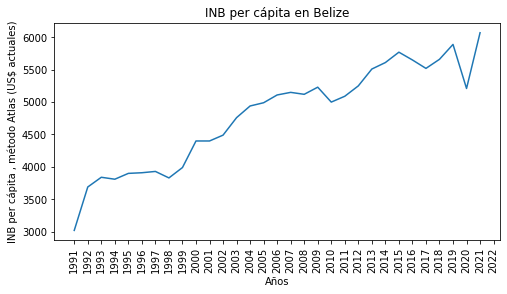

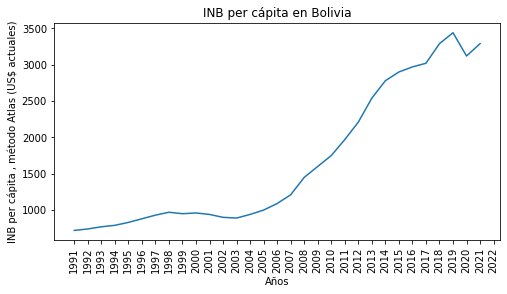

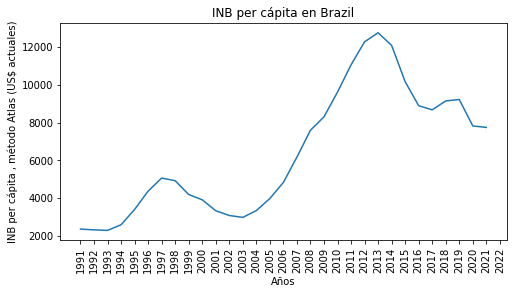

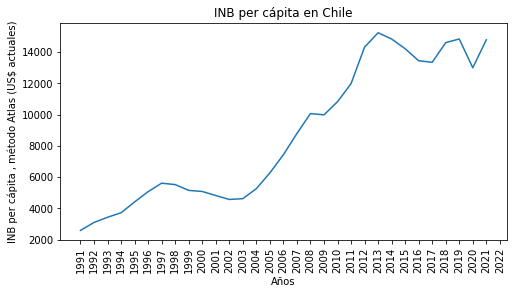

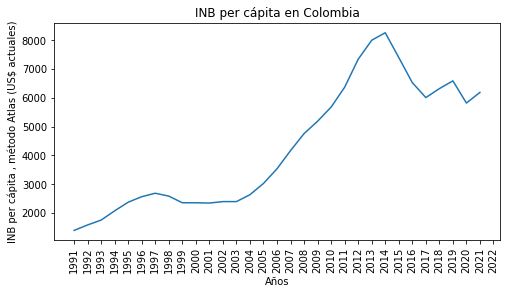

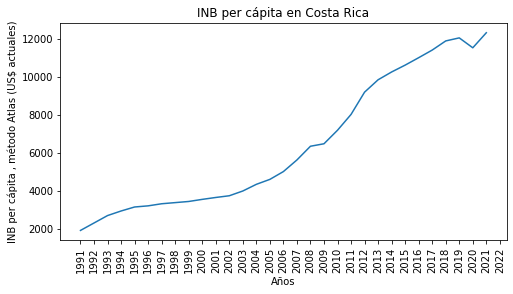

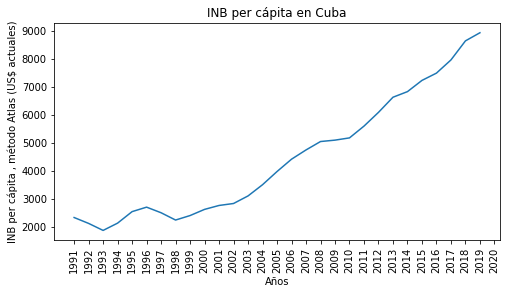

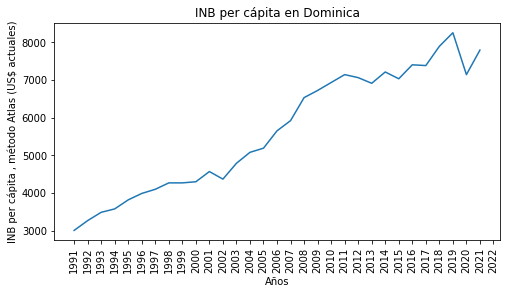

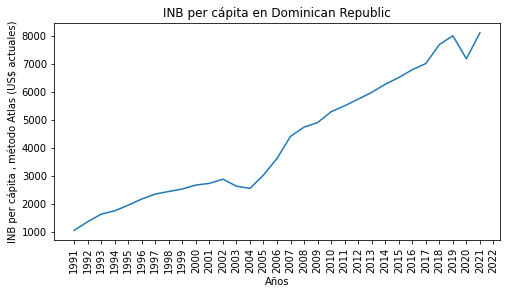

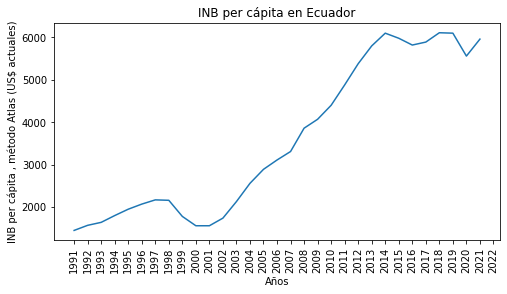

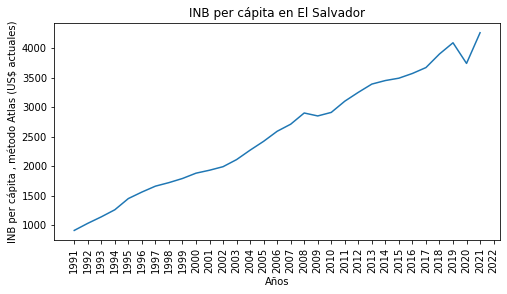

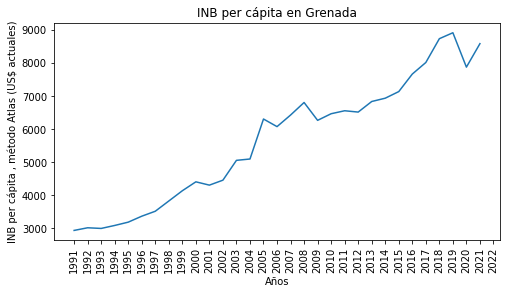

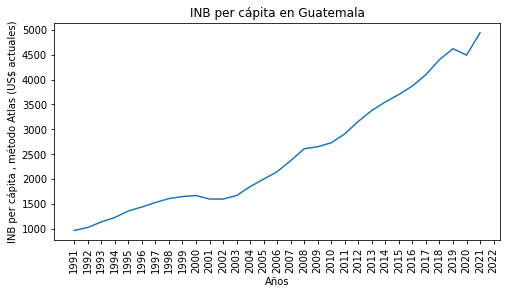

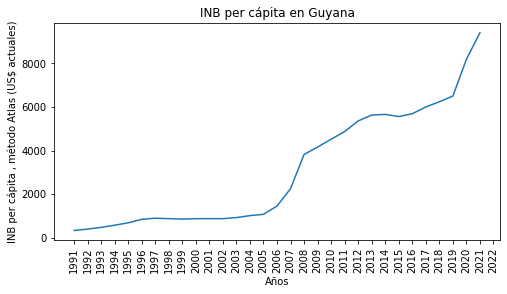

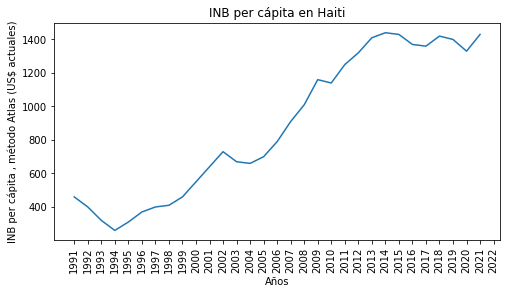

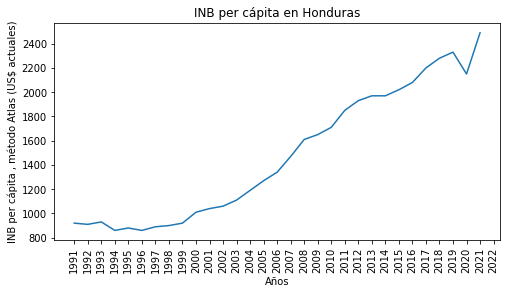

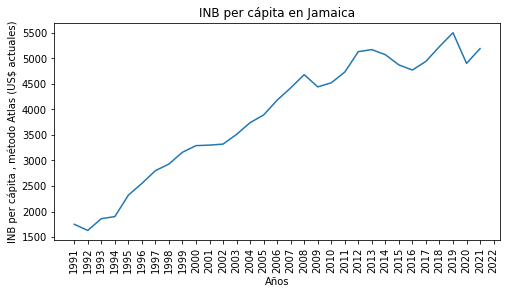

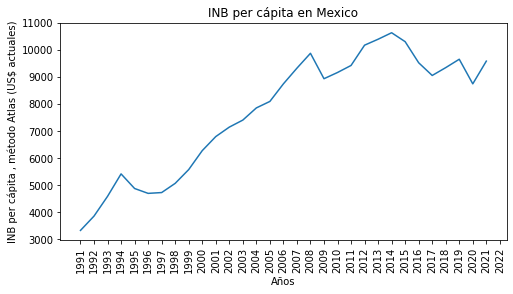

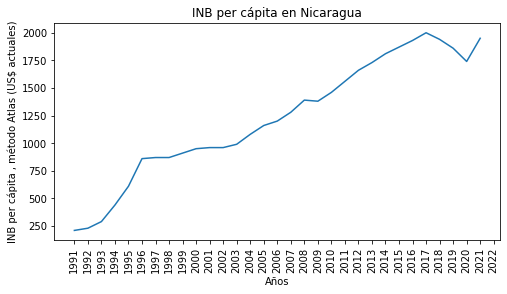

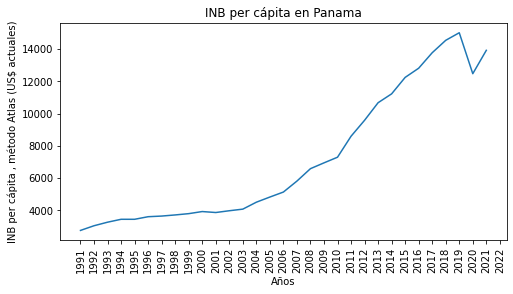

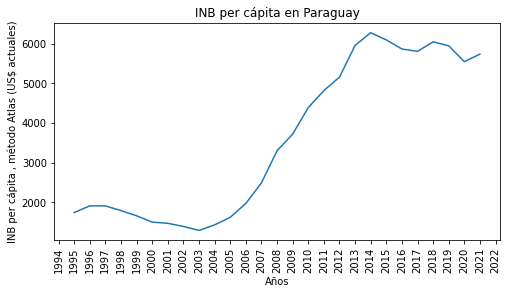

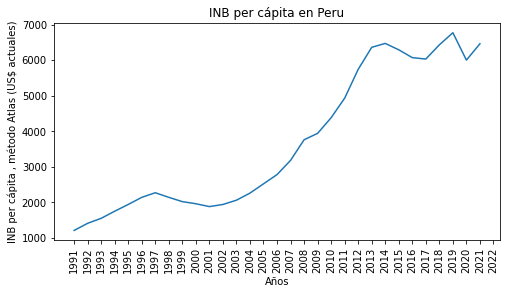

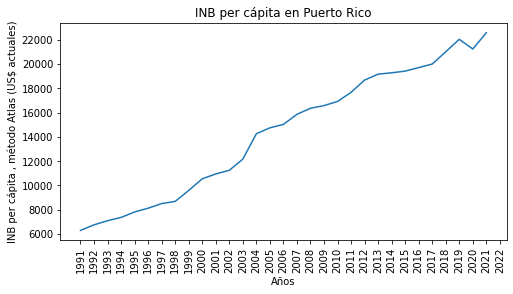

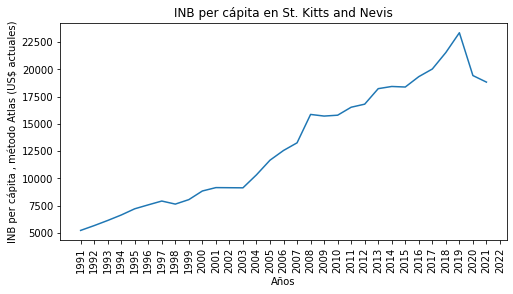

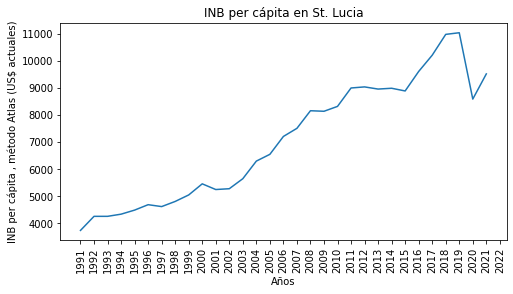

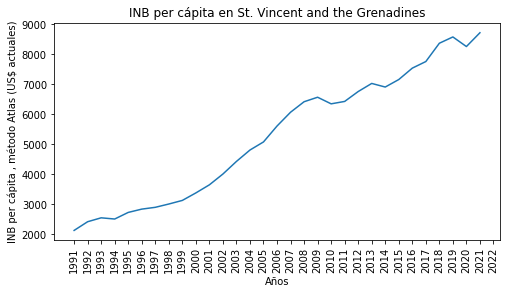

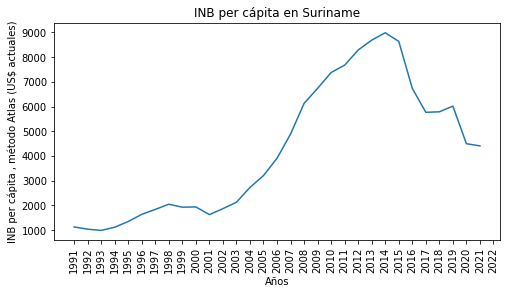

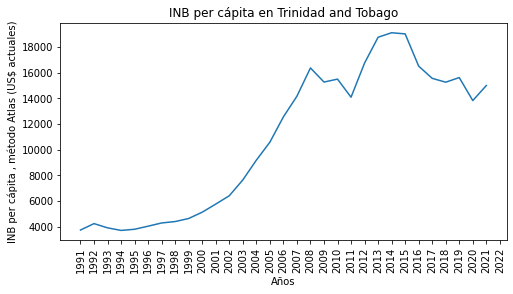

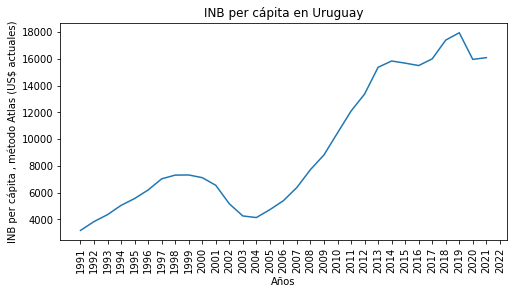

In [217]:
# iteracion sobre cada fila del DataFrame para tener un grafico por cada pais
for index, row in indicador2.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Crear gráfico de línea para cada país
    plt.figure(figsize=(8, 4))
    plt.plot(datos.index, datos.values)
    plt.xlabel('Años')
    plt.ylabel('INB per cápita , método Atlas (US$ actuales)')
    plt.title(f'INB per cápita en {row["Country Name"]}') 
    plt.xticks(rotation='vertical')
    plt.show()

C:\Users\OKKA\AppData\Local\Temp\ipykernel_17424\1259830331.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = indicador2.corr()


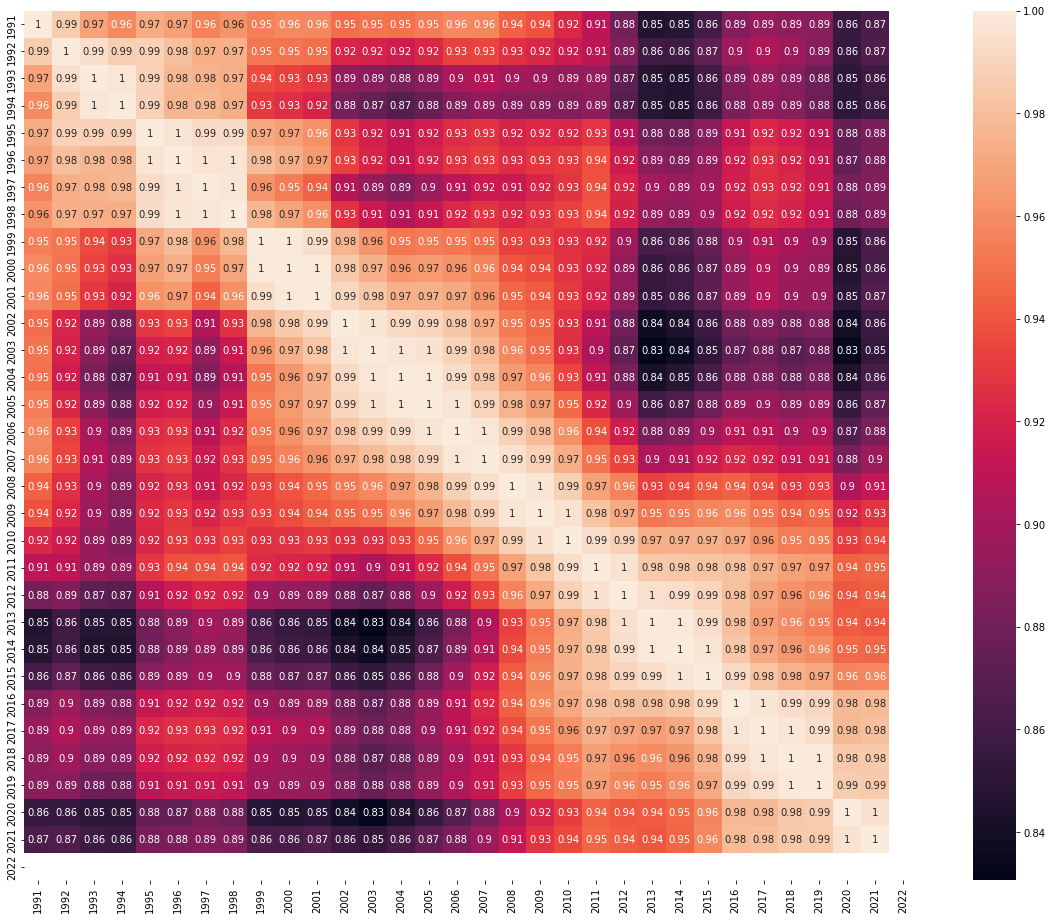

In [218]:
# Matriz de correlación entre las columnas numéricas 'GNI per capita, Atlas method (current US$)' / 'INB per cápita, método Atlas (US$ actuales)'
plt.figure(figsize=(20, 16))  # Ajusta el tamaño de la figura
correlation_matrix = indicador2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation='vertical')
plt.show()

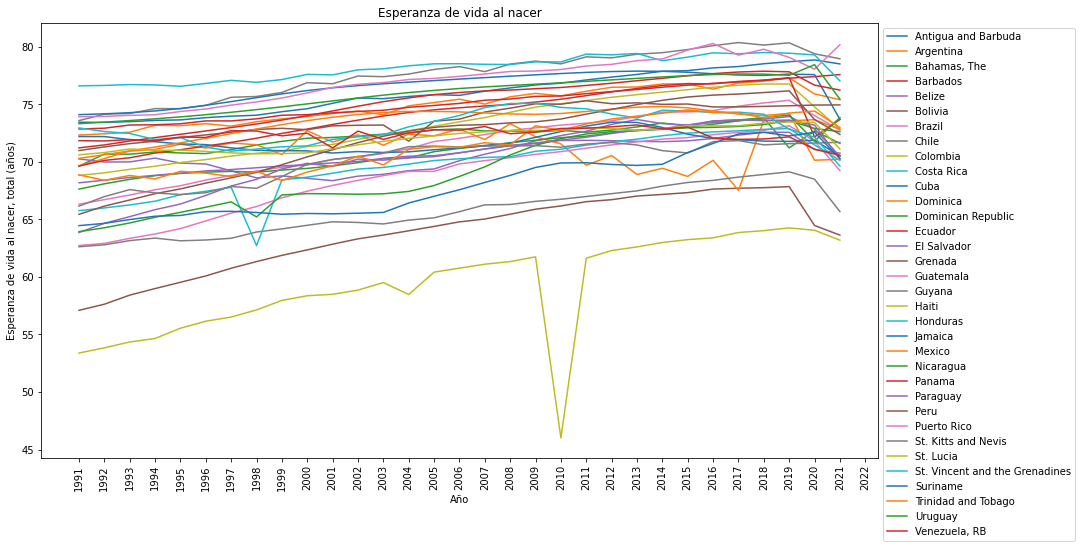

In [219]:
# Crear gráfico de línea para el indicador  'Life expectancy at birth, total (years)' / Esperanza de vida al nacer, total (años)' en todos los paises
plt.figure(figsize=(15, 8))

# Iterar sobre cada fila del DataFrame
for index, row in indicador3.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Agregar la línea correspondiente al país
    plt.plot(datos.index, datos.values, label=row['Country Name'])

plt.xlabel('Año')
plt.ylabel('Esperanza de vida al nacer, total (años)')
plt.title('Esperanza de vida al nacer')
plt.xticks(rotation='vertical')

# Ajustar la ubicación de la leyenda
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

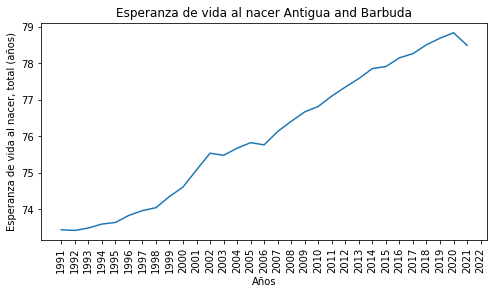

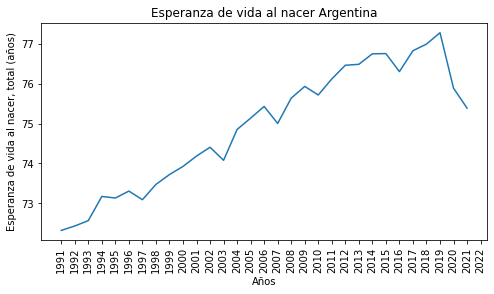

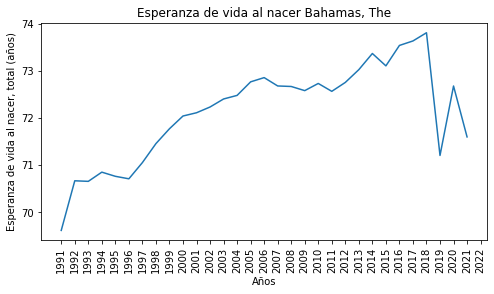

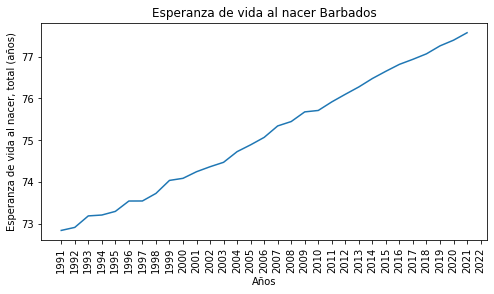

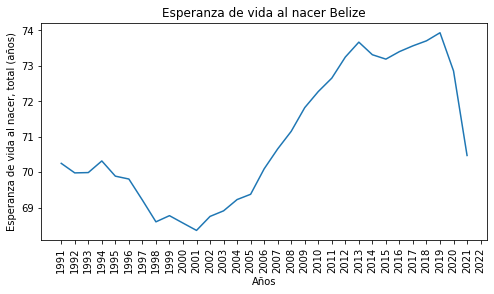

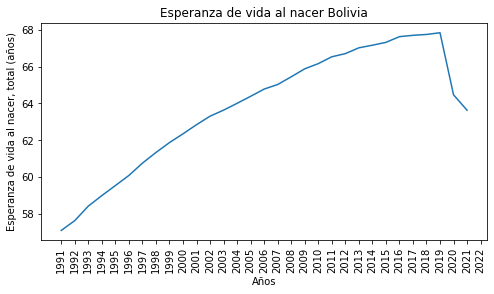

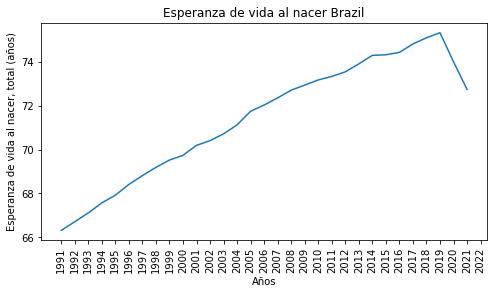

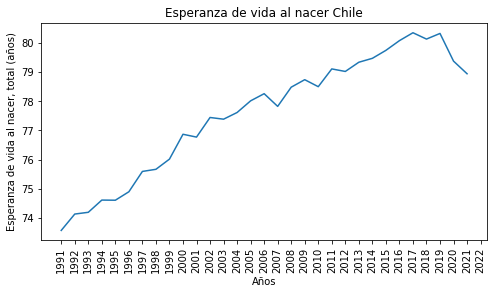

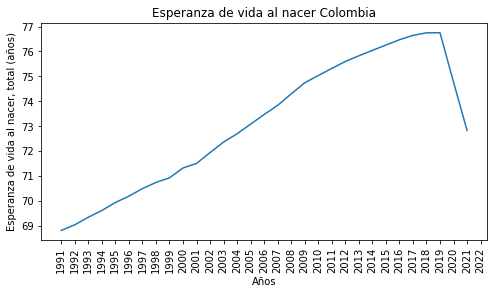

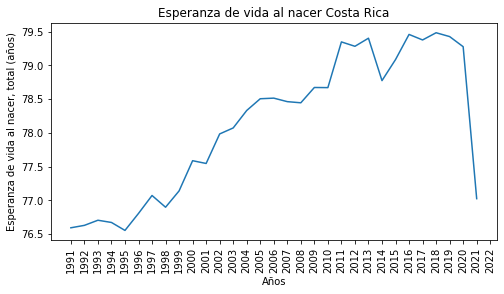

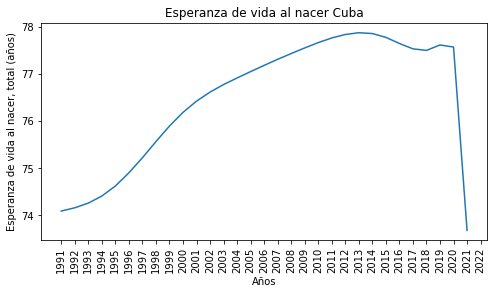

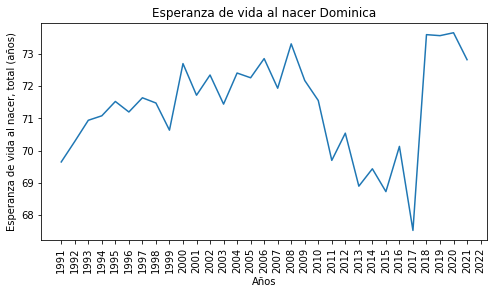

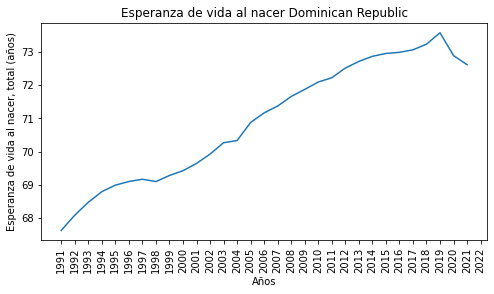

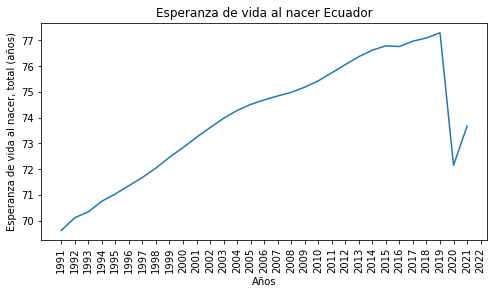

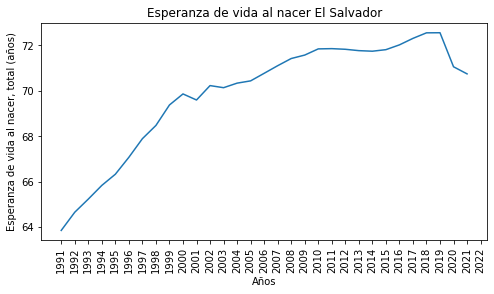

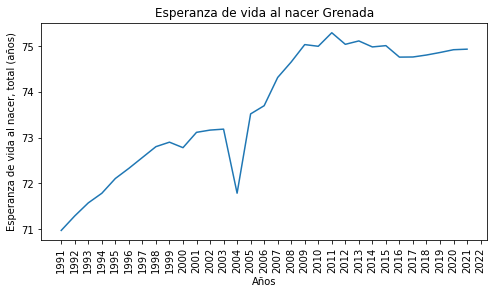

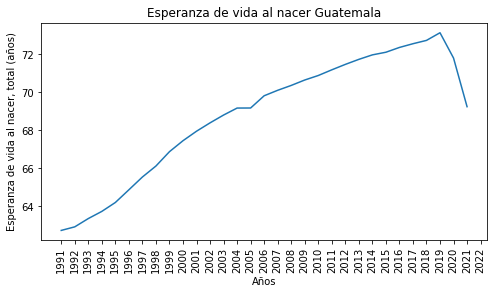

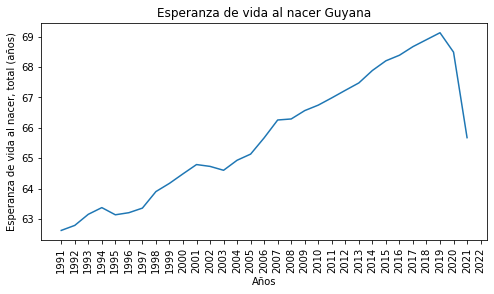

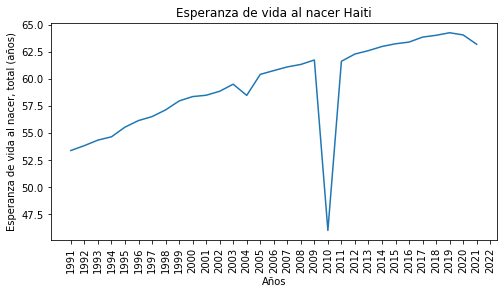

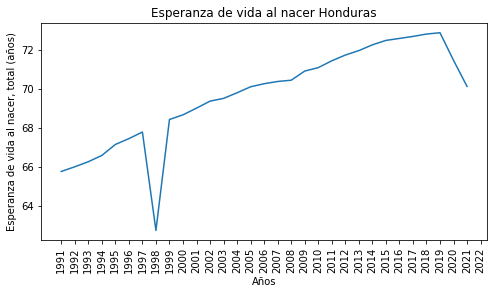

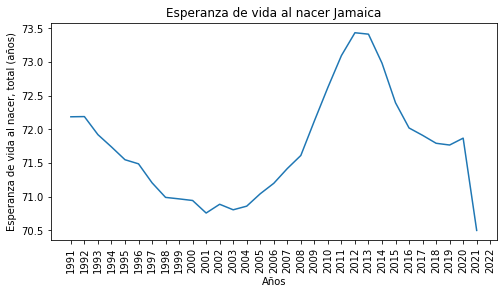

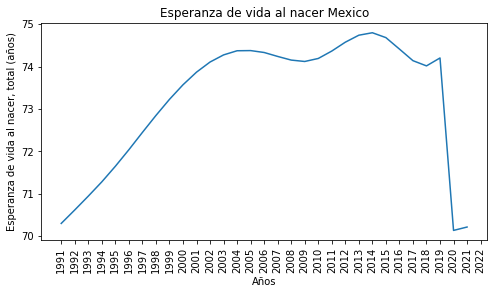

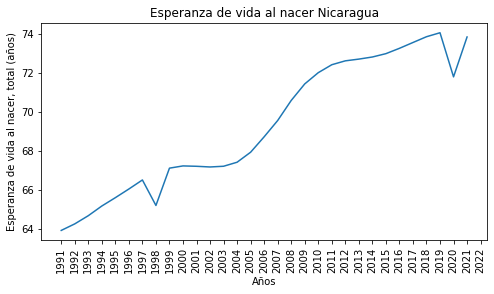

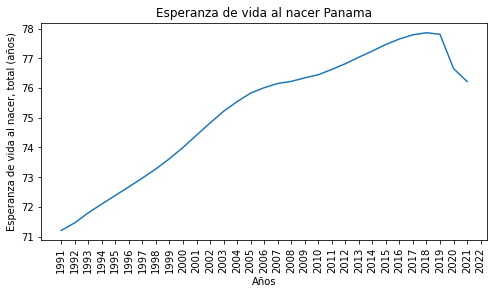

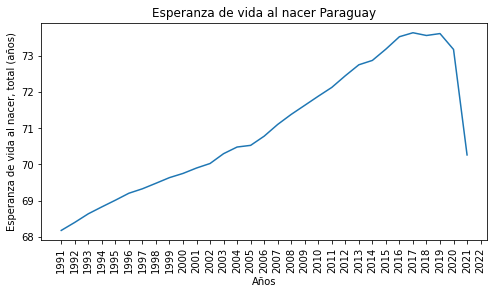

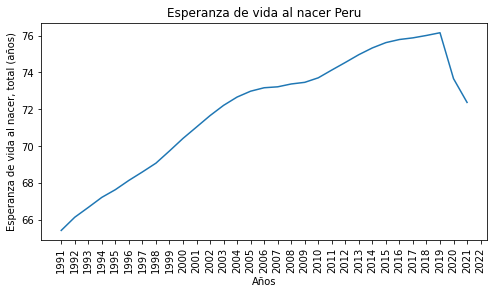

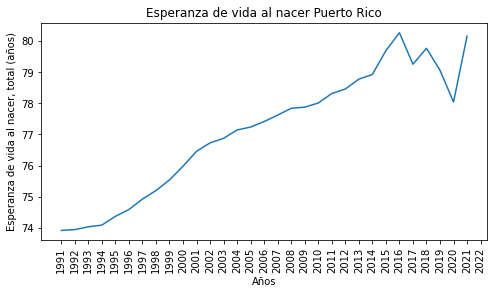

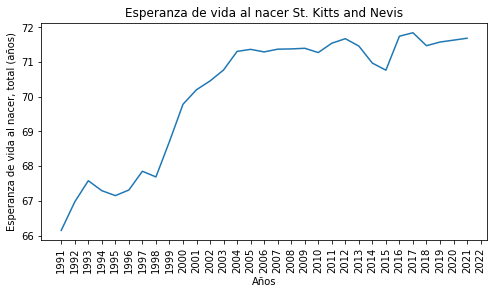

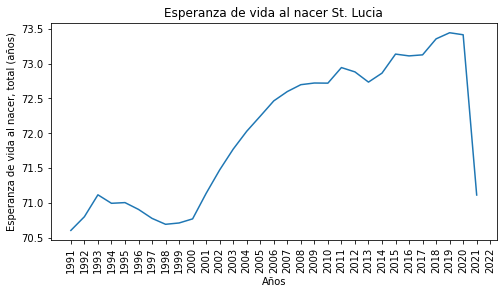

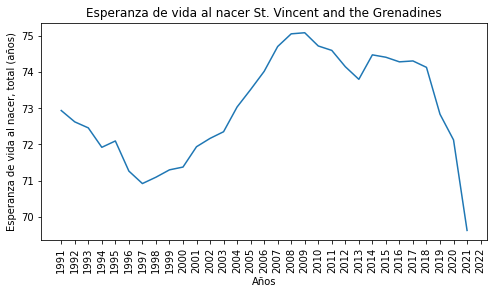

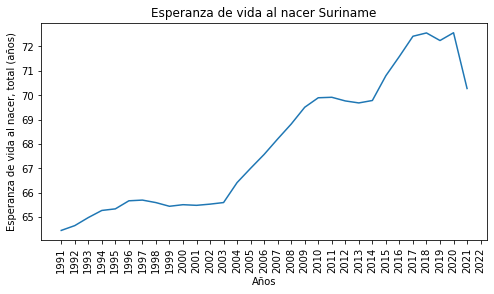

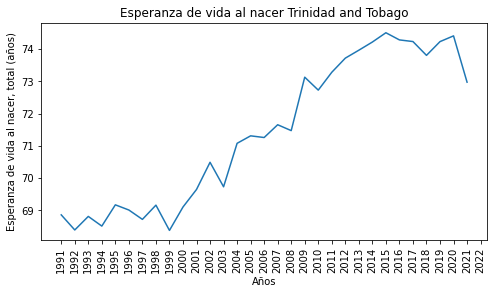

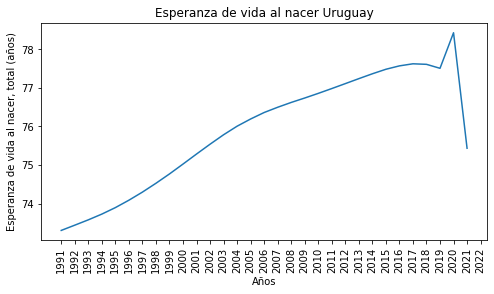

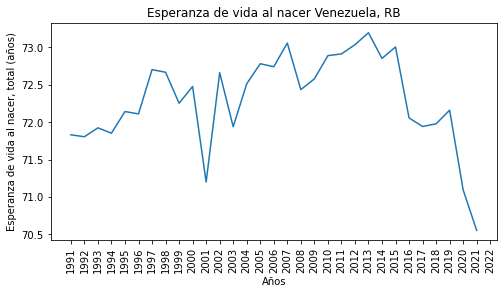

In [220]:
# iteracion sobre cada fila del DataFrame para tener un grafico por cada pais
for index, row in indicador3.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Crear gráfico de línea para cada país
    plt.figure(figsize=(8, 4))
    plt.plot(datos.index, datos.values)
    plt.xlabel('Años')
    plt.ylabel('Esperanza de vida al nacer, total (años)')
    plt.title(f'Esperanza de vida al nacer {row["Country Name"]}') 
    plt.xticks(rotation='vertical')
    plt.show()

C:\Users\OKKA\AppData\Local\Temp\ipykernel_17424\2128402812.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = indicador3.corr()


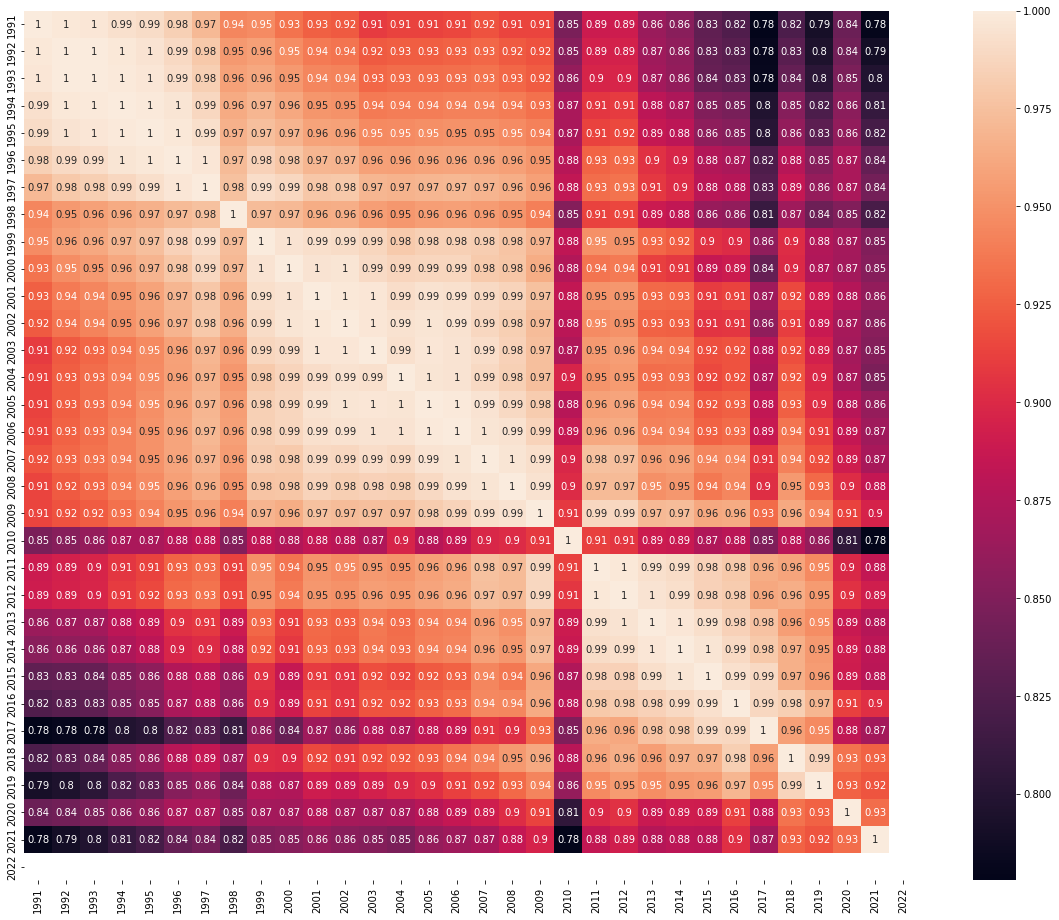

In [221]:
# Matriz de correlación entre las columnas numéricas 'Life expectancy at birth, total (years)' / Esperanza de vida al nacer, total (años)' en todos los paises
plt.figure(figsize=(20, 16))  # Ajusta el tamaño de la figura
correlation_matrix = indicador3.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation='vertical')
plt.show()

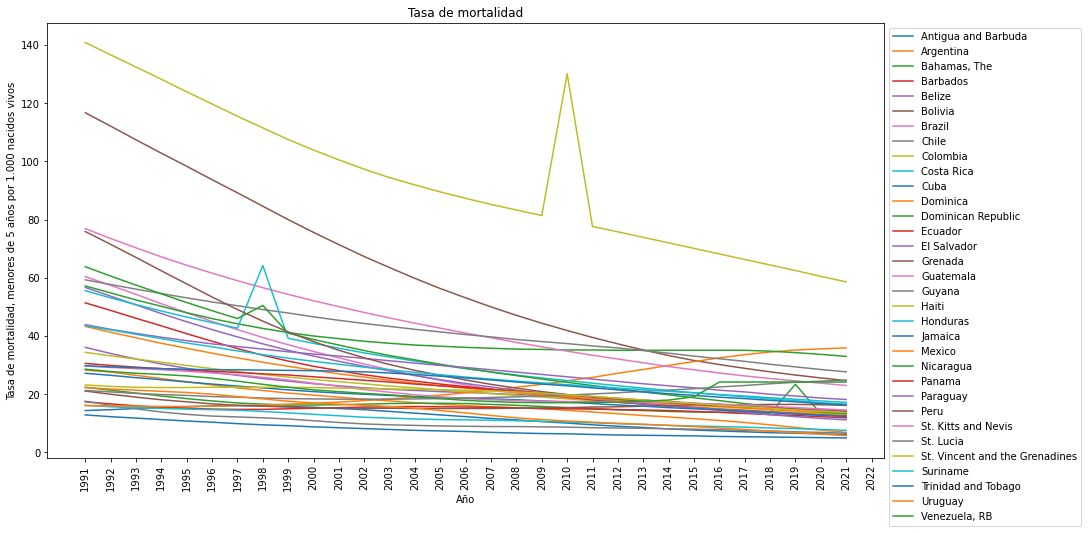

In [222]:
# Crear gráfico de línea para el indicador 'Mortality rate, under-5 (per 1,000 live births)' / 'Tasa de mortalidad, menores de 5 años (por 1.000 nacidos vivos)' en todos los paises
plt.figure(figsize=(15, 8))

# Iterar sobre cada fila del DataFrame
for index, row in indicador4.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Agregar la línea correspondiente al país
    plt.plot(datos.index, datos.values, label=row['Country Name'])

plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad, menores de 5 años por 1.000 nacidos vivos')
plt.title('Tasa de mortalidad')
plt.xticks(rotation='vertical')

# Ajustar la ubicación de la leyenda
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

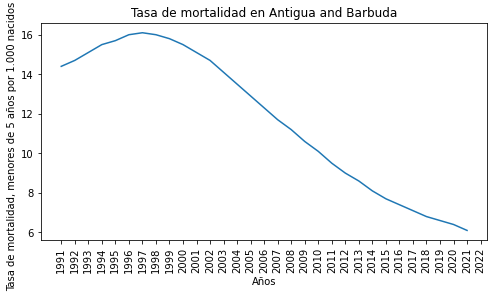

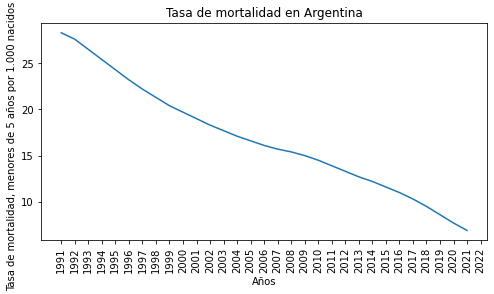

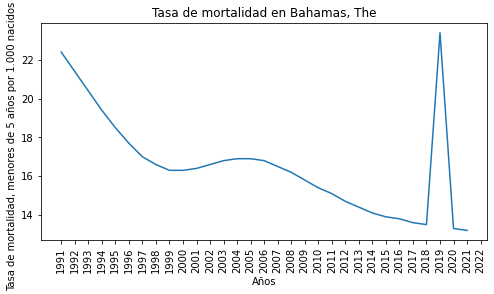

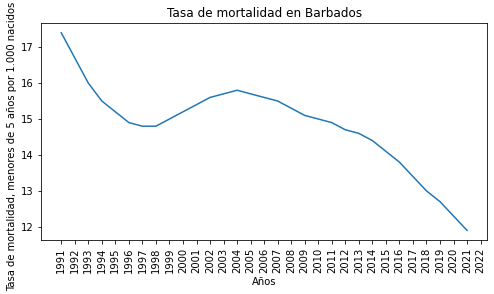

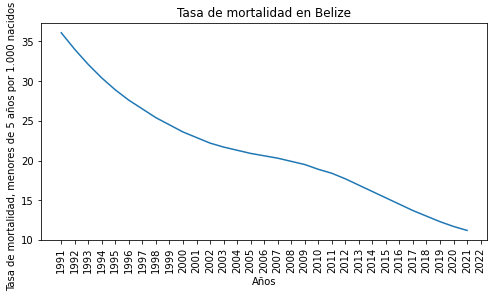

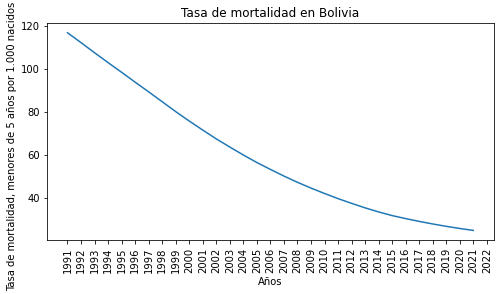

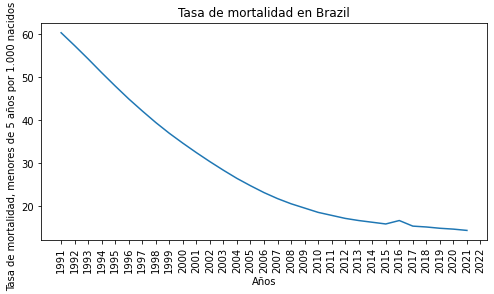

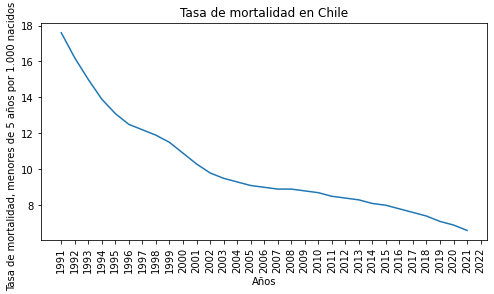

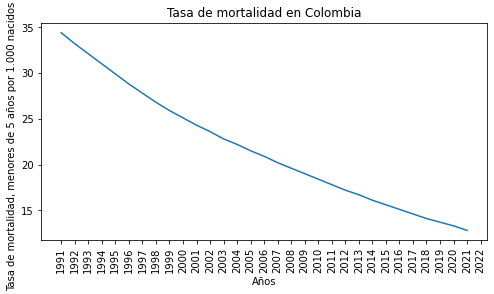

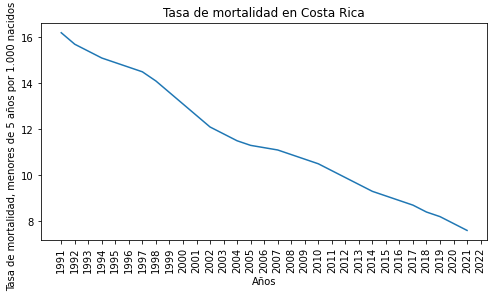

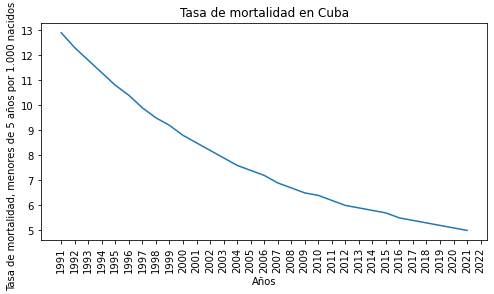

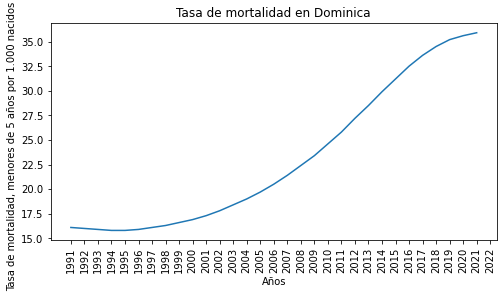

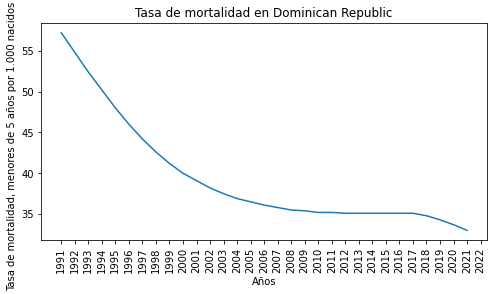

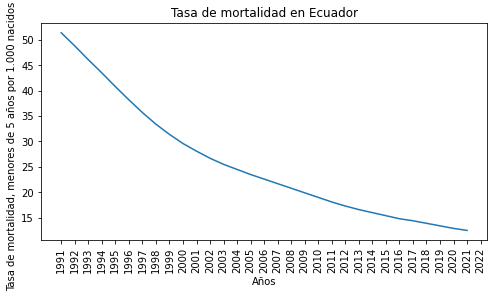

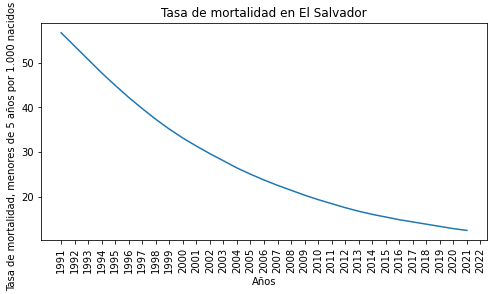

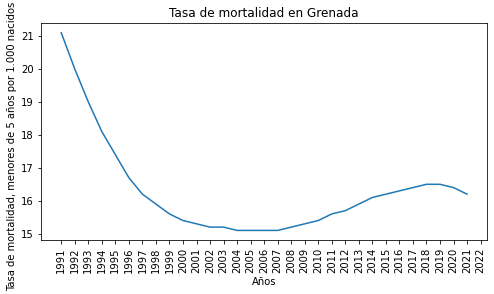

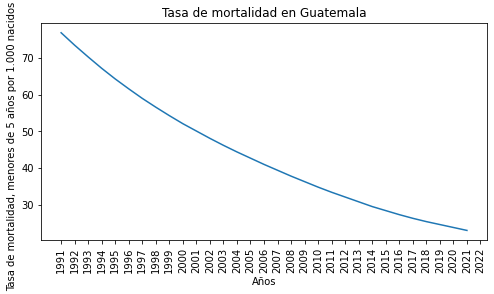

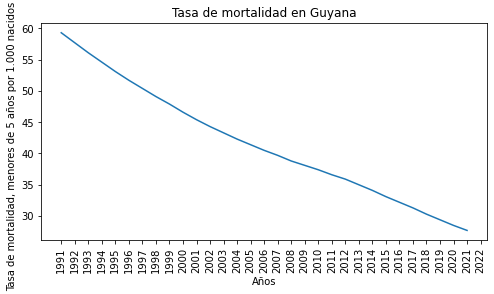

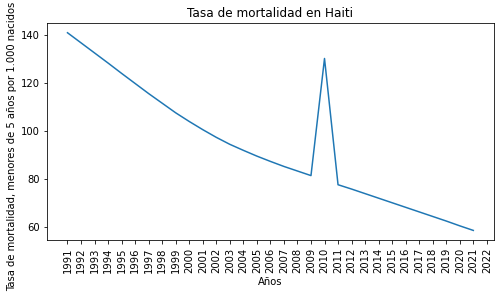

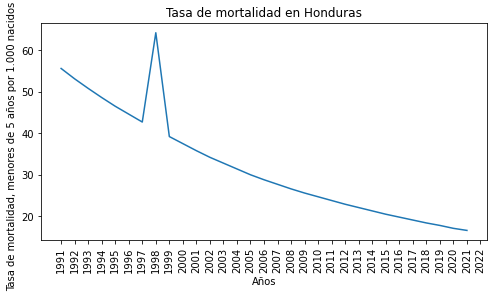

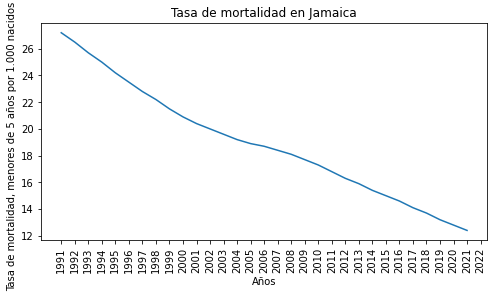

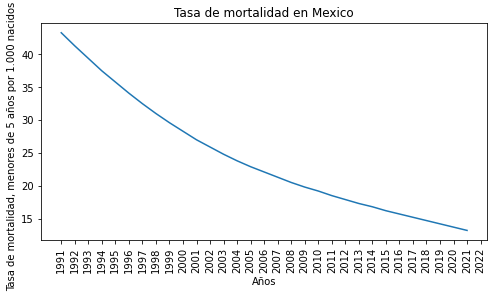

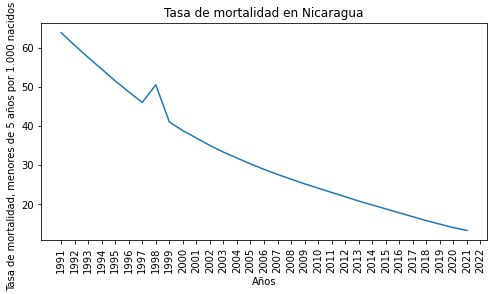

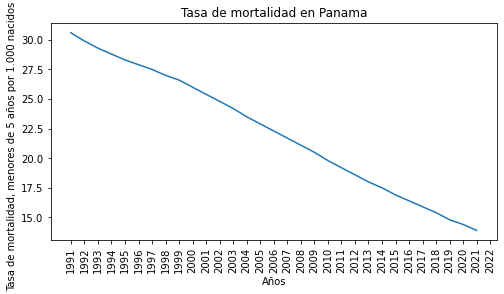

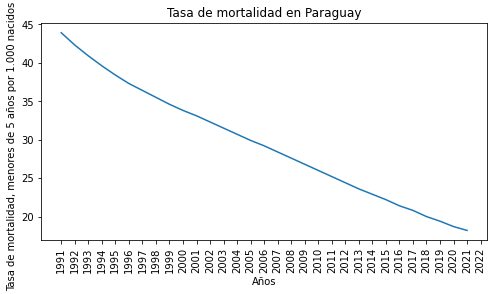

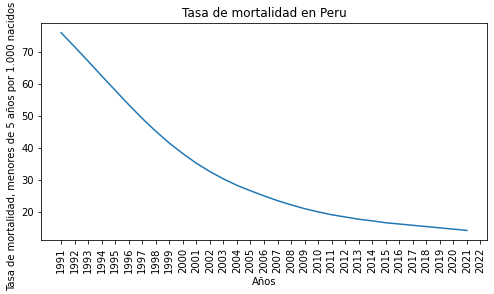

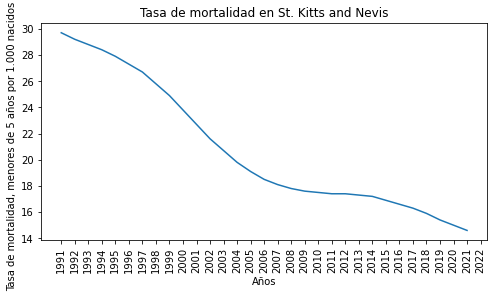

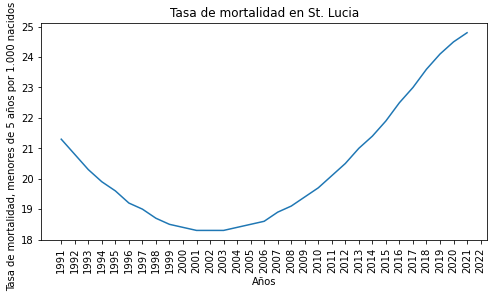

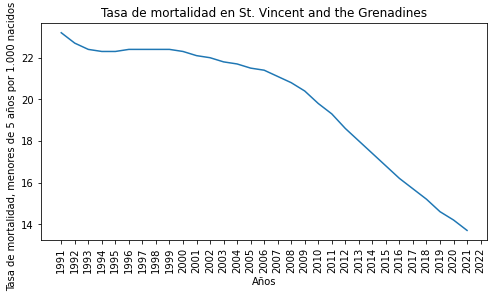

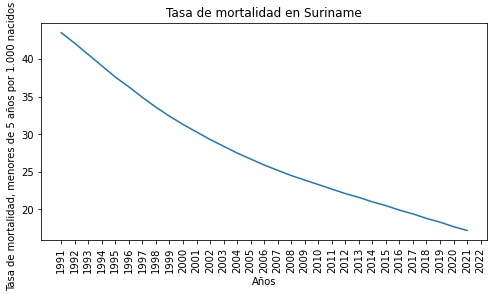

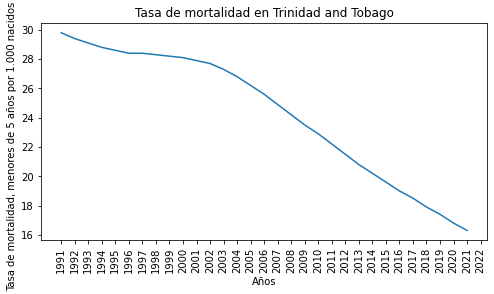

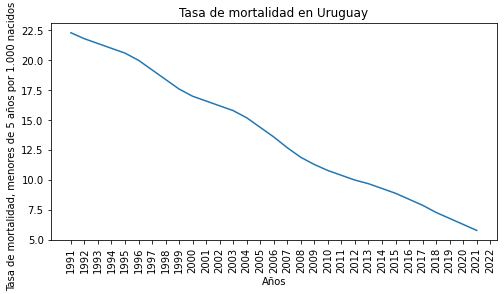

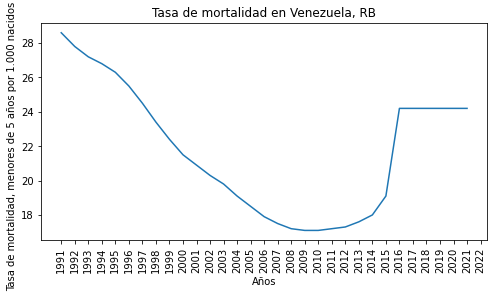

In [223]:
# iteracion sobre cada fila del DataFrame para tener un grafico por cada pais
for index, row in indicador4.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Crear gráfico de línea para cada país
    plt.figure(figsize=(8, 4))
    plt.plot(datos.index, datos.values)
    plt.xlabel('Años')
    plt.ylabel('Tasa de mortalidad, menores de 5 años por 1.000 nacidos vivos')
    plt.title(f'Tasa de mortalidad en {row["Country Name"]}') 
    plt.xticks(rotation='vertical')
    plt.show()

C:\Users\OKKA\AppData\Local\Temp\ipykernel_17424\1063063454.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = indicador4.corr()


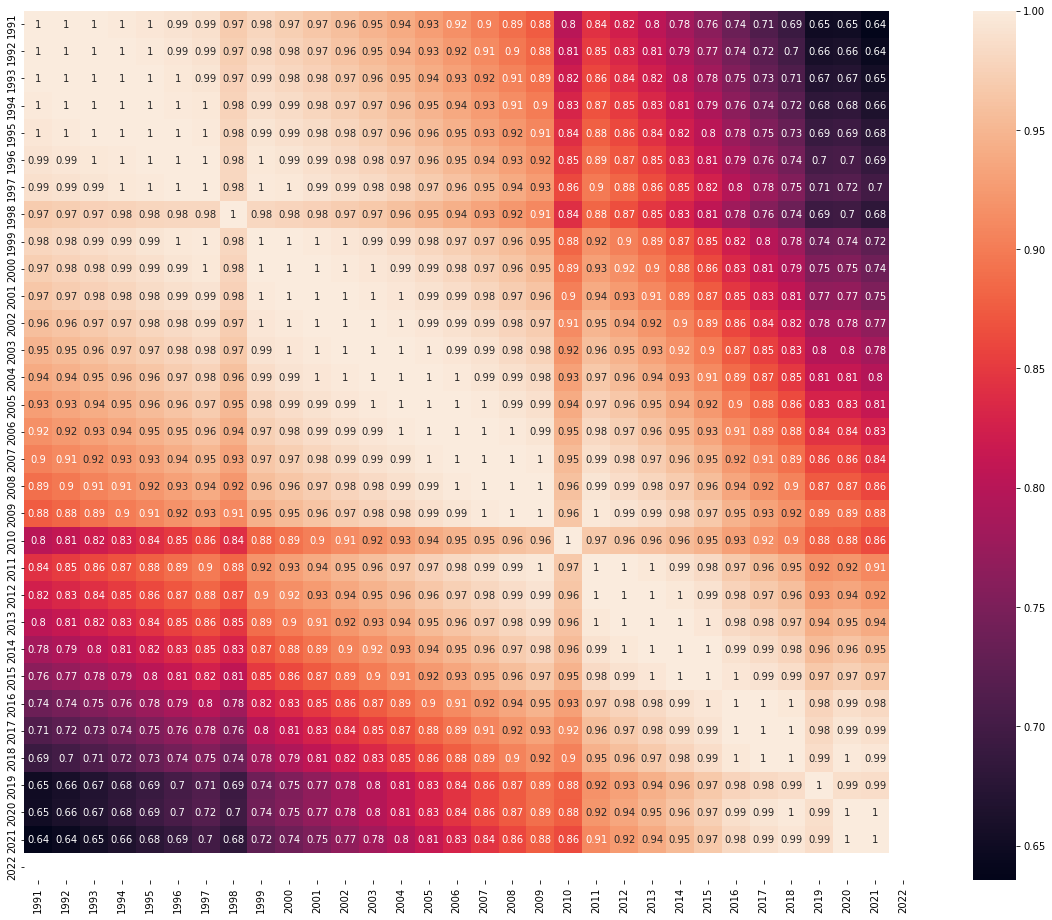

In [224]:
# Matriz de correlación entre las columnas numéricas 'Mortality rate, under-5 (per 1,000 live births)' / 'Tasa de mortalidad, menores de 5 años (por 1.000 nacidos vivos)'
plt.figure(figsize=(20, 16))  # Ajusta el tamaño de la figura
correlation_matrix = indicador4.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation='vertical')
plt.show()

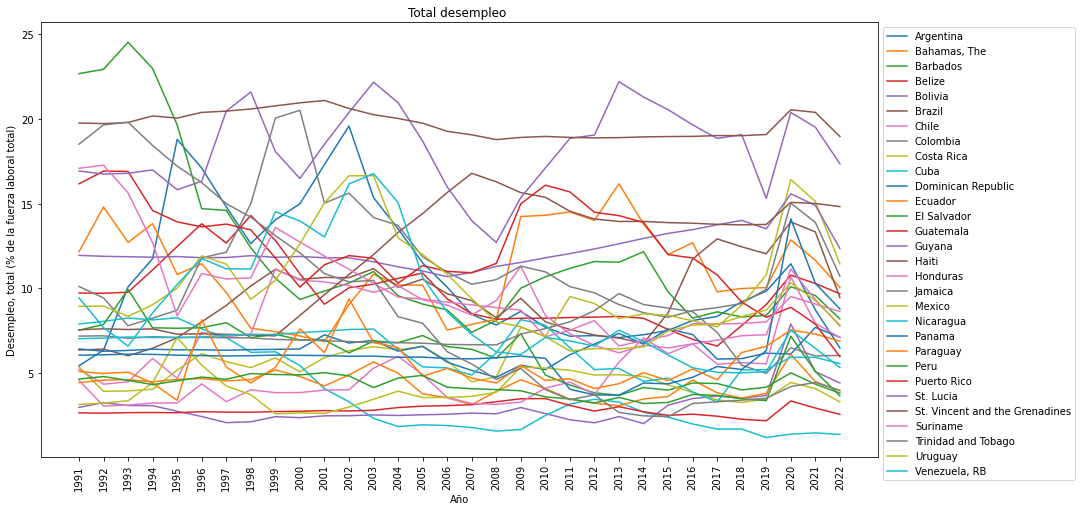

In [225]:
# Crear gráfico de línea para el indicador 'Unemployment, total (% of total labor force) (modeled ILO estimate)', / 
# 'Desempleo, total (% de la fuerza laboral total) (estimación modelada de la OIT)', en todos los paises
plt.figure(figsize=(15, 8))

# Iterar sobre cada fila del DataFrame
for index, row in indicador5.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Agregar la línea correspondiente al país
    plt.plot(datos.index, datos.values, label=row['Country Name'])

plt.xlabel('Año')
plt.ylabel('Desempleo, total (% de la fuerza laboral total)')
plt.title('Total desempleo ')
plt.xticks(rotation='vertical')

# Ajustar la ubicación de la leyenda
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

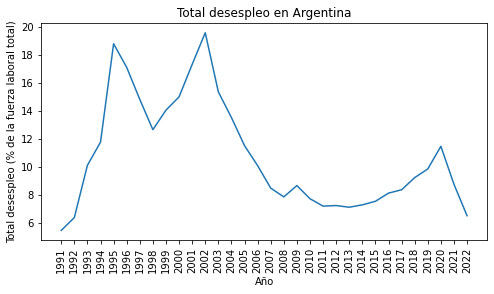

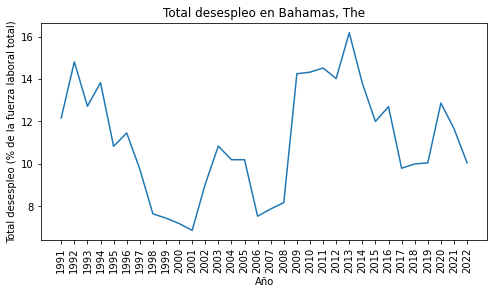

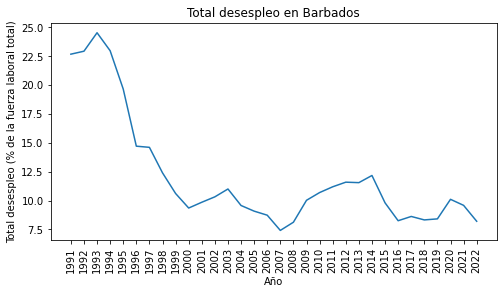

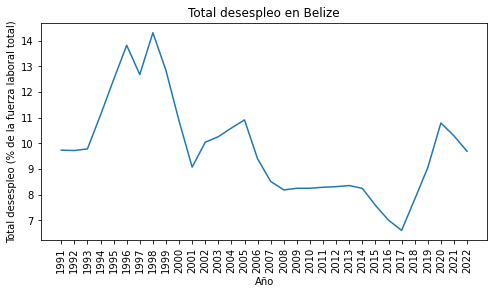

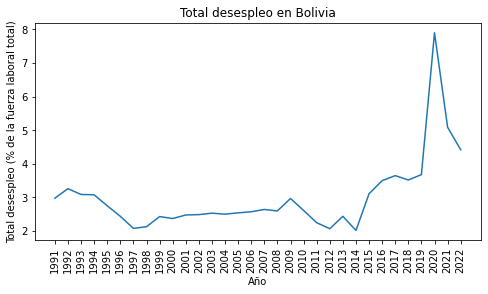

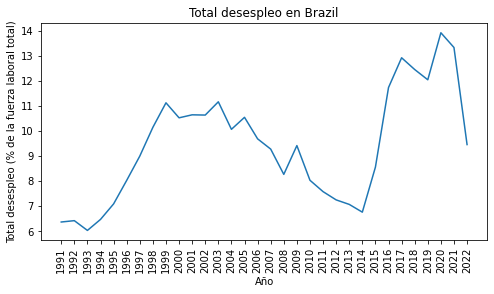

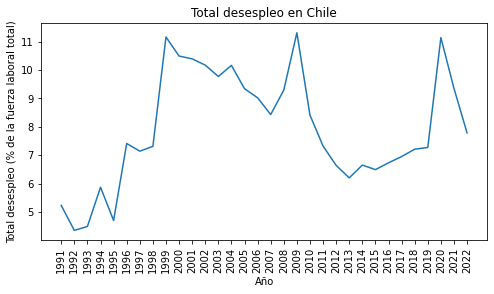

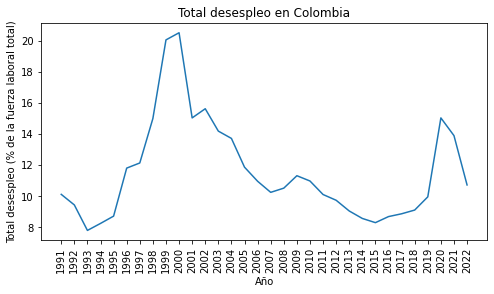

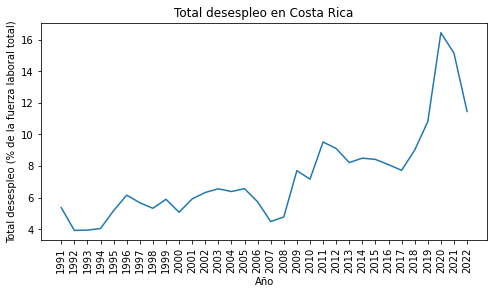

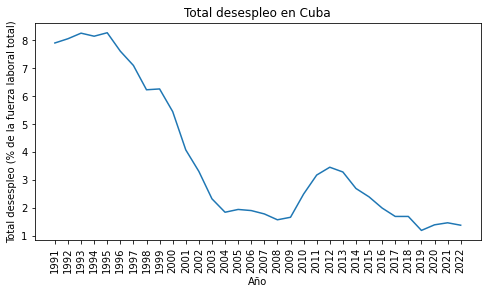

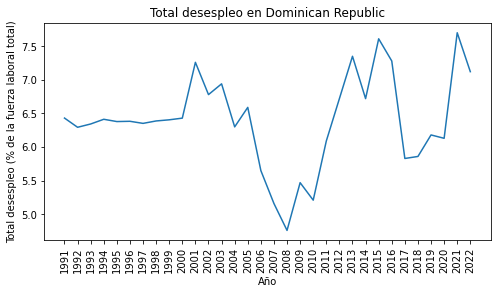

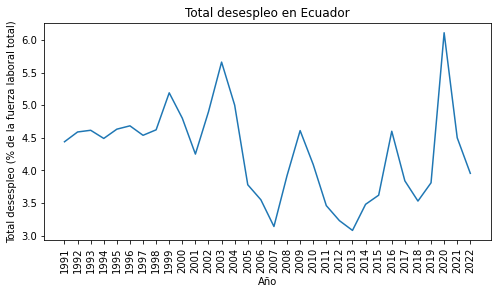

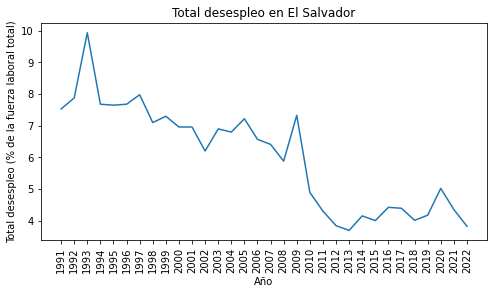

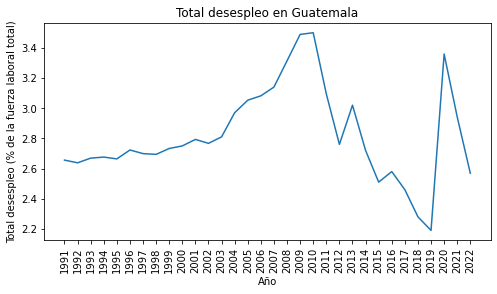

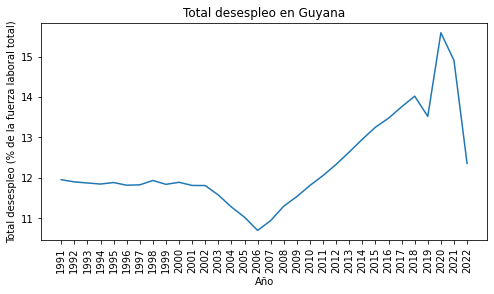

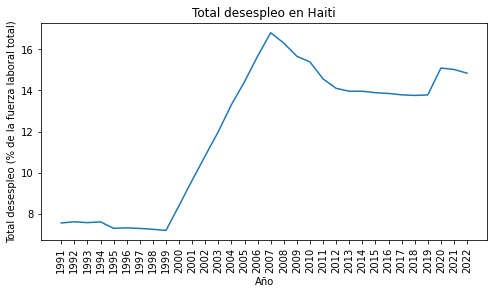

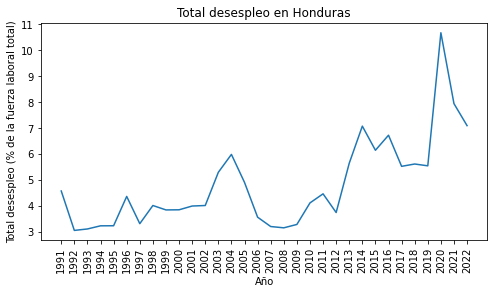

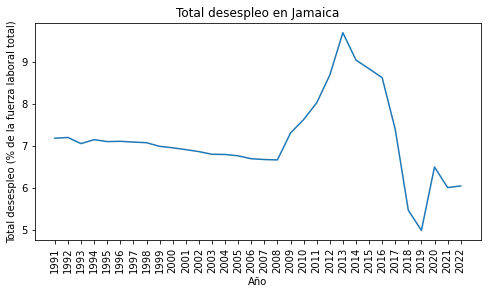

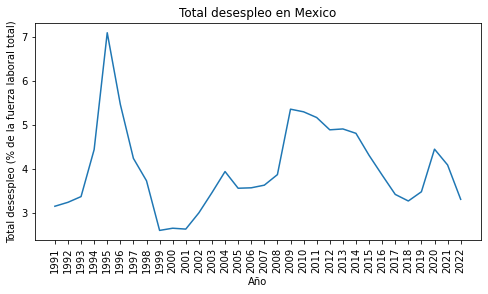

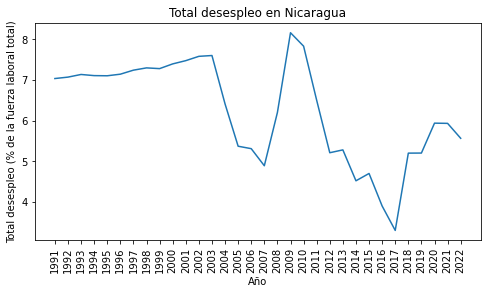

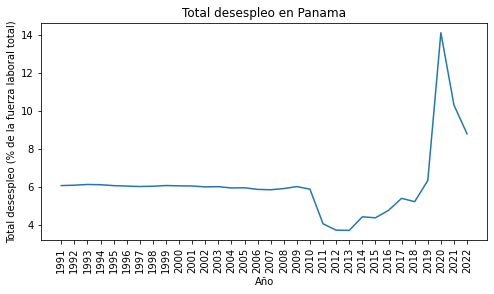

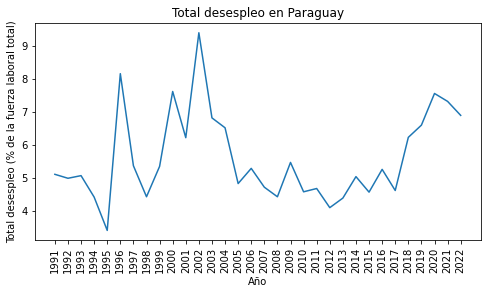

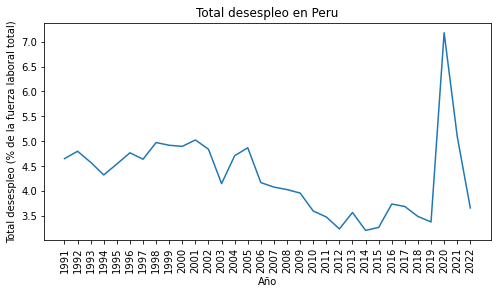

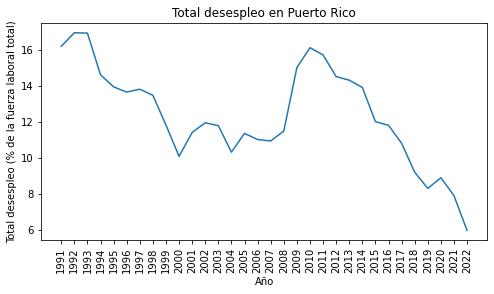

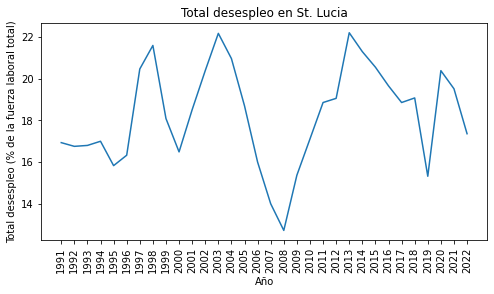

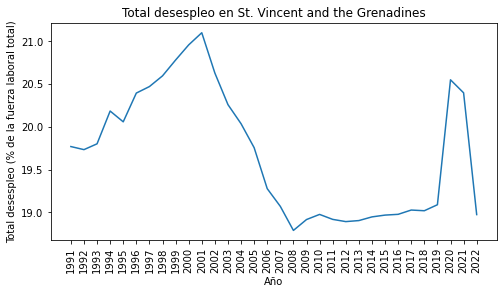

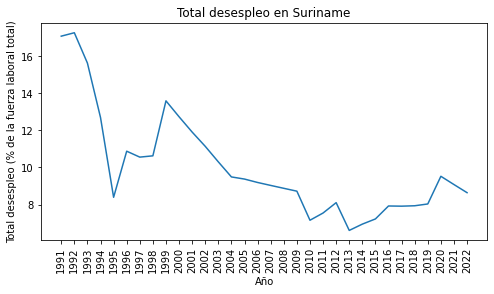

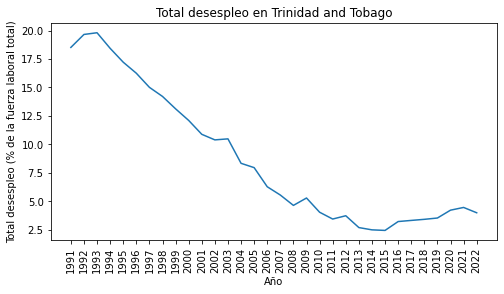

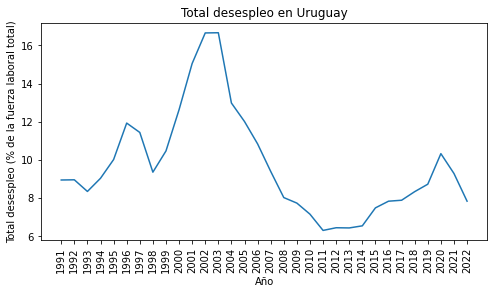

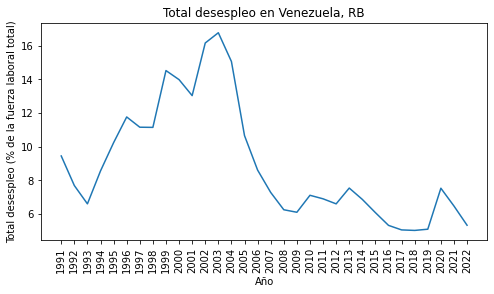

In [226]:
# iteracion sobre cada fila del DataFrame para tener un grafico por cada pais
for index, row in indicador5.iterrows():
    datos = row[4:]  # Seleccionar todas las columnas a partir de la columna '1991'

    # Crear gráfico de línea para cada país
    plt.figure(figsize=(8, 4))
    plt.plot(datos.index, datos.values)
    plt.xlabel('Año')
    plt.ylabel('Total desespleo (% de la fuerza laboral total)')
    plt.title(f'Total desespleo en {row["Country Name"]}')
    plt.xticks(rotation='vertical')
    plt.xticks(rotation='vertical')
    plt.show()

C:\Users\OKKA\AppData\Local\Temp\ipykernel_17424\2808095933.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = indicador5.corr()


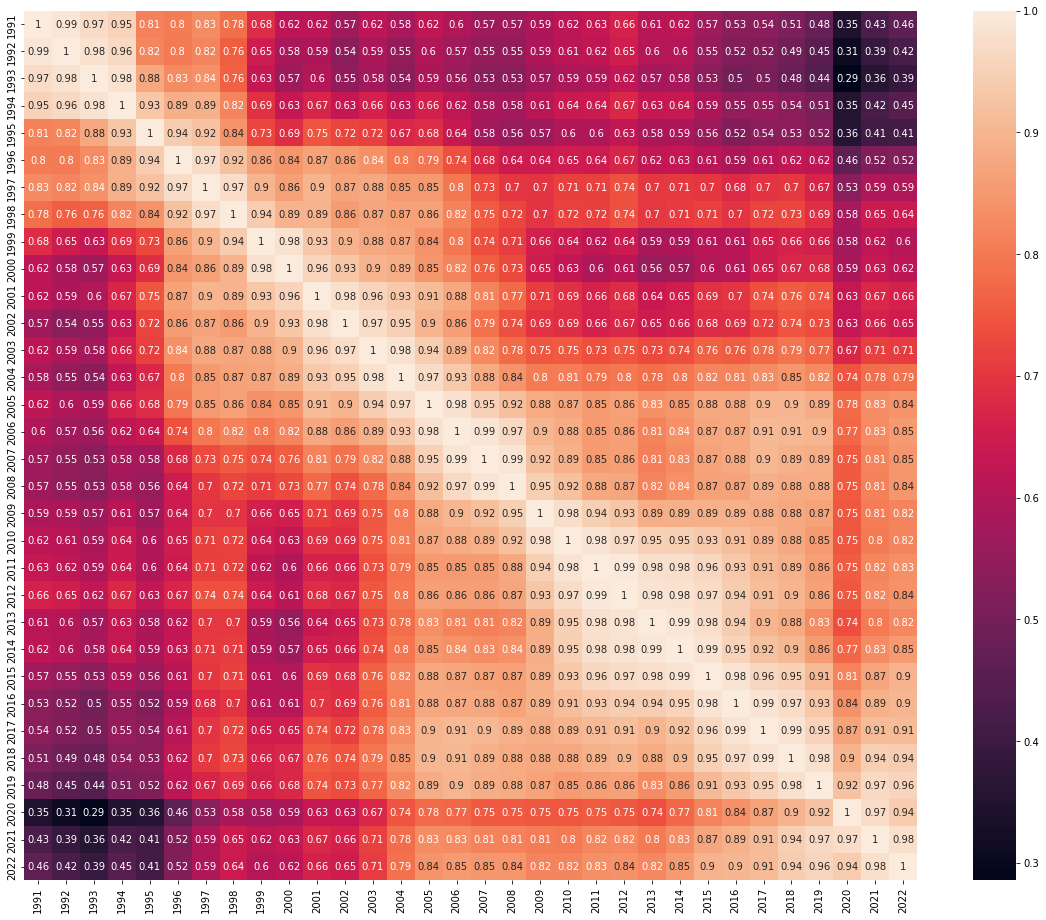

In [227]:
# Matriz de correlación entre las columnas numéricas 'GNI per capita, Atlas method (current US$)' / 'INB per cápita, método Atlas (US$ actuales)'
plt.figure(figsize=(20, 16))  # Ajusta el tamaño de la figura
correlation_matrix = indicador5.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation='vertical')
plt.show()